In [2]:
import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.stats import zscore
import scvelo as scv
from dtne import *

In [14]:
NR1_2 =sc.read_h5ad('F:/spatial/HIP/NR1_2/spatial_transfer_digital_layer_15.h5ad')

In [4]:
NR1_2

AnnData object with n_obs × n_vars = 10156 × 25556
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column'
    obsm: 'stereo'
    layers: 'imputed'

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


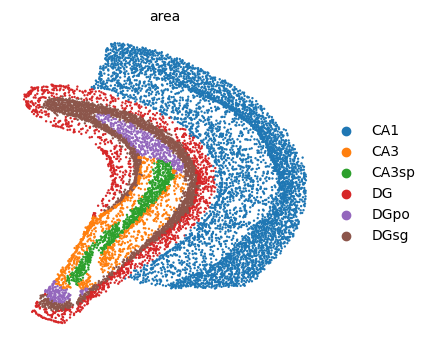

In [8]:
scv.pl.scatter(NR1_2, basis='stereo',color='area',cmap='viridis',legend_loc='right margin',figsize=(4,4))

In [15]:
NR2_2 =sc.read_h5ad('F:/spatial/HIP/NR2_2/spatial_transfer_digital_layer_15.h5ad')

In [6]:
NR2_2

AnnData object with n_obs × n_vars = 10188 × 25508
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column'
    obsm: 'stereo'
    layers: 'imputed'

In [7]:
NR = NR1_2.concatenate(NR2_2,batch_categories=['NR1_2', 'NR2_2'],batch_key='slice',index_unique=None,join='outer')

In [12]:
NR

AnnData object with n_obs × n_vars = 20344 × 26636
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice'
    obsm: 'stereo', 'X_stereo'
    layers: 'imputed'

In [10]:
NR_DG = NR[NR.obs['Subclass_transfer']=='DG Glut']

In [11]:
NR_DG.obs['New_Type_transfer']

79833     DG Glut 0
79835     DG Glut 0
79848     DG Glut 0
81797     DG Glut 0
81805     DG Glut 0
            ...    
108689    DG Glut 0
108759    DG Glut 0
108818    DG Glut 0
108832    DG Glut 0
109932    DG Glut 0
Name: New_Type_transfer, Length: 5191, dtype: category
Categories (3, object): ['DG Glut 0', 'DG Glut 1', 'DG Glut 2']

In [12]:
NR_DGp = NR_DG[NR_DG.obs['digital_column'].between(4, 10)]

In [13]:
NR_DGsg=NR_DGp[NR_DGp.obs['area']=='DGsg']

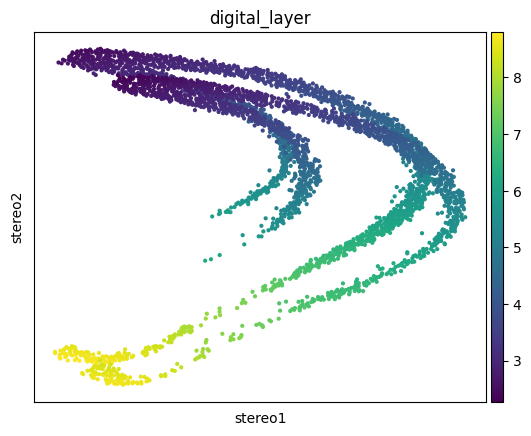

In [14]:
sc.pl.embedding(NR_DGsg, basis='stereo',color='digital_layer',alpha=None)

In [15]:
NR_HIP_DG_PC1gene = pd.read_csv('F:/spatial/HIP/HIP_DG_NR_PC1rank_new.csv',index_col='Gene')

In [16]:
NR_HIP_DG_PC1gene

Empty DataFrame
Columns: []
Index: [Stard8, Csgalnact1, Cdh18, Acsl3, Kcnq5, Ntng1, Fhitos, Flrt2, Acvr1c, Ppp1r14c, Aspn, Fbln2, Slc7a15, Hnmt, 5033421B08Rik, 4933421D24Rik, B230307C23Rik, Nxpe2, Sgk1, Gm49267, Prmt7, Samd4, Gm26827, Gm37986, Sgcd, Gm4117, Atp5b, Ogn, 4930404N11Rik, Epha10, Fnbp1l, Kctd1, Gm16759, 1810034E14Rik, Hyal1, Gm30551, Gm13944, Gm4651, Klhl33, Sel1l3, Eif5b, Papss2, D3Ertd751e, Gm13544, Grm3, Lrrc6, Rgs19, Fbxo32, Tesc, Gm816, Gm28905, Nxpe4, Cd226, Gm20713, Ghr, Ndst4, 4930556N13Rik, Gm16599, Gm19522, Lrrc55, Phykpl, Iqch, Gm6994, 4930595D18Rik, Rorb, Gm4779, 4831440D22Rik, Gm42875, Rsbn1l, Gm19605, Tmem258, Hbp1, Rasgrp1, 4921534H16Rik, Tube1, Sox2ot, Gm48512, 4933424G05Rik, Gm16054, Tmem164, Mageh1, Gsg1l, Oprd1, Ttn, Rai14, Ttyh1, 8030451O07Rik, Wwp1, Gm44079, Smad3, 9630013A20Rik, Gm31763, Gm38562, Mcc, Daglb, Zfp808, Rpl3, Gabpb1, Gm33206, Gm47423, ...]

[831 rows x 0 columns]

In [17]:
adata_index =NR_DGsg.var.index.astype(str)

In [18]:
adata_index

Index(['0610005C13Rik', '0610006L08Rik', '0610009B22Rik', '0610009O20Rik',
       '0610010F05Rik', '0610010K14Rik', '0610012D04Rik', '0610012G03Rik',
       '0610025J13Rik', '0610030E20Rik',
       ...
       'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1', 'mt-Nd2', 'mt-Nd3', 'mt-Nd4',
       'mt-Nd4l', 'mt-Nd5', 'mt-Nd6'],
      dtype='object', length=26636)

In [19]:
PC1_index =NR_HIP_DG_PC1gene.index.astype(str)

In [20]:
PC1_index

Index(['Stard8', 'Csgalnact1', 'Cdh18', 'Acsl3', 'Kcnq5', 'Ntng1', 'Fhitos',
       'Flrt2', 'Acvr1c', 'Ppp1r14c',
       ...
       'Dgkb', 'Nrg1', 'Pex5l', 'Grid2', 'Car10', 'Sgcz', 'Cntn4', 'Tenm4',
       'Nrxn3', 'Cdh13'],
      dtype='object', name='Gene', length=831)

In [21]:
common_index  =PC1_index.intersection(adata_index)

In [22]:
common_index

Index(['Stard8', 'Csgalnact1', 'Cdh18', 'Acsl3', 'Kcnq5', 'Ntng1', 'Fhitos',
       'Flrt2', 'Acvr1c', 'Ppp1r14c',
       ...
       'Dgkb', 'Nrg1', 'Pex5l', 'Grid2', 'Car10', 'Sgcz', 'Cntn4', 'Tenm4',
       'Nrxn3', 'Cdh13'],
      dtype='object', length=782)

In [23]:
NR_DG_PC1 =NR_DGsg[:,common_index]

In [24]:
# 备份原始数据的 X 矩阵
NR_DGsg.layers['original_X'] = NR_DGsg.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR_DGsg.X = NR_DGsg.layers['imputed'].copy()
# 若存在 NaN 值，可以用 0 填充，或其他适合的值
NR_DGsg.X = np.nan_to_num(NR_DGsg.X, nan=0)

In [28]:
# 备份原始数据的 X 矩阵
NR_DG.layers['original_X'] = NR_DG.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR_DG.X = NR_DG.layers['imputed'].copy()


In [25]:
# 备份原始数据的 X 矩阵
NR_DG_PC1.layers['original_X'] = NR_DG_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR_DG_PC1.X = NR_DG_PC1.layers['imputed'].copy()
NR_DG_PC1.X = np.nan_to_num(NR_DG_PC1.X, nan=0)

In [53]:
# 备份原始数据的 X 矩阵
NR1_1_DG_PC1.layers['original_X'] = NR1_1_DG_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR1_1_DG_PC1.X = NR1_1_DG_PC1.layers['imputed'].copy()
NR1_1_DG_PC1.X = np.nan_to_num(NR1_1_DG_PC1.X, nan=0)

In [107]:
# 备份原始数据的 X 矩阵
NR2_1_l23_PC1.layers['original_X'] = NR2_1_l23_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR2_1_l23_PC1.X = NR2_1_l23_PC1.layers['imputed'].copy()
NR2_1_l23_PC1.X = np.nan_to_num(NR2_1_l23_PC1.X, nan=0)

In [30]:
# 若存在 NaN 值，可以用 0 填充，或其他适合的值
NR_l23.X = np.nan_to_num(NR_l23.X, nan=0)

NR_l23_PC1.X = np.nan_to_num(NR_l23_PC1.X, nan=0)

NameError: name 'NR_l23' is not defined

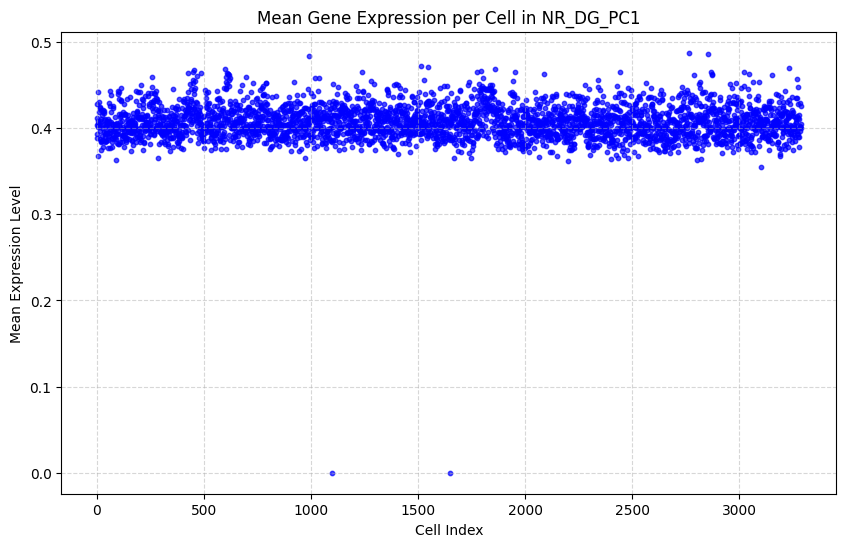

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = NR_DG_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in NR_DG_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [28]:
NR_DGsg = NR_DGsg[~NR_DGsg.obs.index.duplicated(keep='first')]
NR_DG_PC1 = NR_DG_PC1[~NR_DG_PC1.obs.index.duplicated(keep='first')]


In [29]:
# Step 1: 获取基因表达数据
g = NR_DG_PC1.X.mean(axis=1).flatten()

# Step 2: 计算 vmin 和 vmax
vmin, vmax = np.percentile(g, 1), np.percentile(g, 99)

# Step 3: 创建布尔掩码
mask = (g >= vmin) & (g <= vmax)

# Step 4: 提取满足条件的细胞
filtered_NR_DG_PC1 = NR_DG_PC1[mask]
removed_cells = NR_DG_PC1.obs.index[~mask]  # 获取被移除的细胞索引

# Step 5: 确保索引对齐并在 NR_DGsg 中去掉相同细胞
common_indices = NR_DGsg.obs.index.intersection(NR_DG_PC1.obs.index)  # 获取共享索引
filtered_NR_DGsg = NR_DGsg[common_indices]  # 首先确保索引对齐
filtered_NR_DGsg = filtered_NR_DGsg[~filtered_NR_DGsg.obs.index.isin(removed_cells)]  # 再移除细胞

# 打印结果
print(f"原始 NR_DG_PC1 细胞数: {NR_DG_PC1.n_obs}, 筛选后: {filtered_NR_DG_PC1.n_obs}")
print(f"原始 NR_DGsg 细胞数: {NR_DGsg.n_obs}, 筛选后: {filtered_NR_DGsg.n_obs}")


原始 NR_DG_PC1 细胞数: 3109, 筛选后: 3045
原始 NR_DGsg 细胞数: 3109, 筛选后: 3045


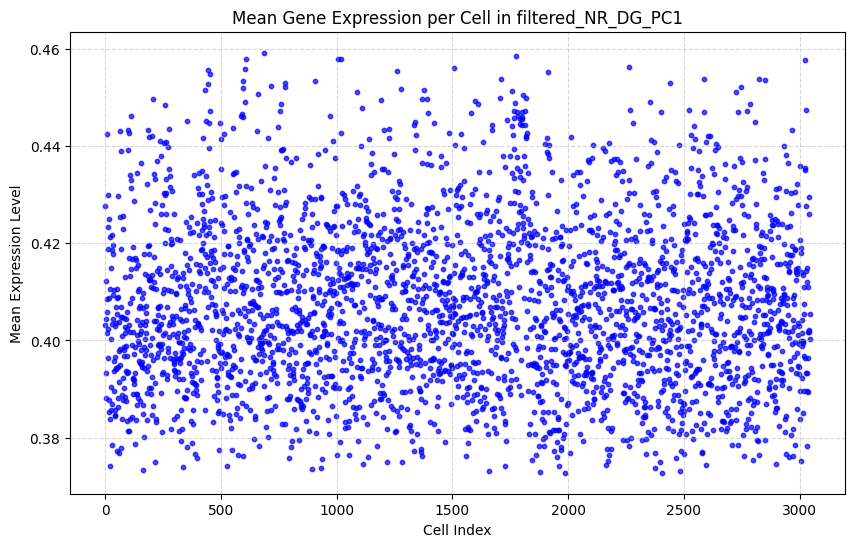

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = filtered_NR_DG_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in filtered_NR_DG_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


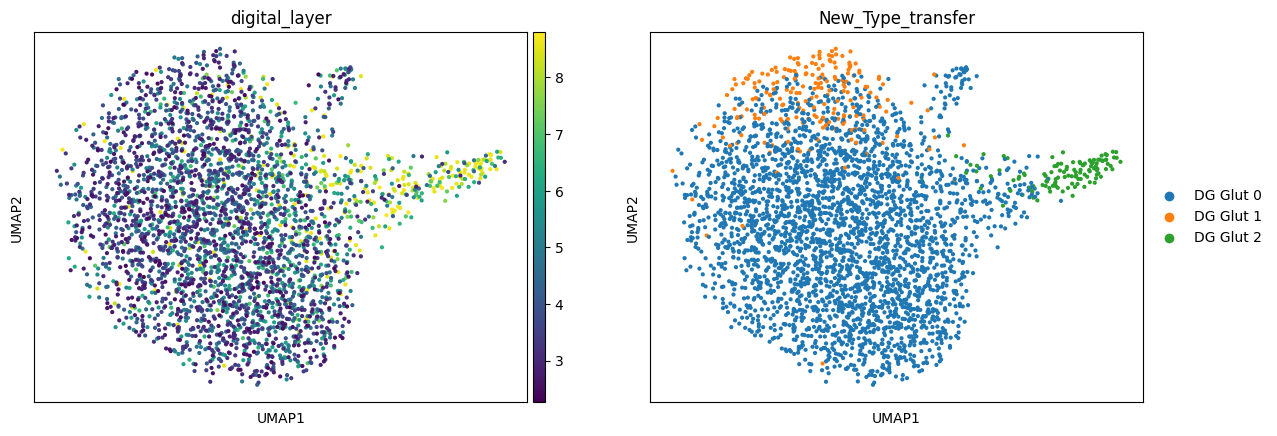

In [227]:
sc.pp.neighbors(NR_DG_PC1, use_rep="X")
sc.tl.umap(NR_DG_PC1)
sc.tl.diffmap(NR_DG_PC1)
#sc.tl.leiden(NR_DG_PC1)
sc.pl.umap(NR_DG_PC1,color=['digital_layer','New_Type_transfer'])

In [265]:
N_DG_umap = filtered_NR_DG_PC1.obsm['X_umap'][:,0]

In [127]:
np.argmin(N_DG_umap).max(axis=0)

53

In [266]:
np.argmax(N_DG_umap).max(axis=0)

1263

In [268]:
filtered_NR_DG_PC1[filtered_NR_DG_PC1.obs.index[1263]].obs 

orig.ident  nCount_Spatial  nFeature_Spatial  area  coor_x  coor_y  \
97688    Spatial           381.0               255  DGsg   14889   15783   

            areaL1     coor_x_ad    coor_y_ad left_right  ...  \
97688  Hippocampus  12469.056975  4601.273393      right  ...   

      integration_partition_confidence Subclass_transfer Subclass_confidence  \
97688                         0.945538           DG Glut                 1.0   

       New_Type_transfer New_Type_confidence  digital_layer digital_column  \
97688          DG Glut 2            0.839312       6.915762        6.36095   

       slice  dpt_pseudotime  highlight  
97688  NR1_2        0.059683      other  

[1 rows x 23 columns]

In [767]:
NR_l23_PC1[NR_l23_PC1.obs.index[1073]].obs

orig.ident  nCount_Spatial  nFeature_Spatial      area  coor_x  coor_y  \
95936    Spatial           639.0               332  VISp-L23   14701   20431   

      areaL1     coor_x_ad     coor_y_ad left_right  ...  \
95936     V1  12476.972497  11818.869539      right  ...   

      integration_partition_confidence Subclass_transfer Subclass_confidence  \
95936                         0.937218       L2/3 IT CTX                 1.0   

       Type_transfer Type_confidence  digital_layer  slice  leiden  highlight  \
95936  L2/3 IT CTX C         0.75402        3.84287  NR2_2       1       True   

      dpt_pseudotime  
95936            0.0  

[1 rows x 23 columns]

In [769]:
N_l23_umap[1073]

13.68293

In [818]:
NR_l23_PC1[NR_l23_PC1.obs.index[69]].obs

orig.ident  nCount_Spatial  nFeature_Spatial     area  coor_x  coor_y  \
77123    Spatial           852.0               573  VISp-L5   12417    8309   

      areaL1     coor_x_ad     coor_y_ad left_right  ...  \
77123     V1  10657.865702  12262.281562      right  ...   

      integration_partition_confidence Subclass_transfer Subclass_confidence  \
77123                         0.588525       L2/3 IT CTX                 1.0   

       Type_transfer Type_confidence  digital_layer  slice  leiden  highlight  \
77123  L2/3 IT CTX C        0.657888       5.484989  NR1_2       1      False   

      dpt_pseudotime  
77123       0.046283  

[1 rows x 23 columns]

In [55]:
filtered_NR_DG_PC1=sc.read_h5ad('filtered_NR_DG_PC1_spatial_15.h5ad')

In [37]:
filtered_NR_DG_PC1

AnnData object with n_obs × n_vars = 2998 × 782
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'dpt_pseudotime', 'highlight'
    uns: 'New_Type_transfer_colors', 'diffmap_evals', 'highlight_colors', 'iroot', 'neighbors', 'umap'
    obsm: 'X_diffmap', 'X_stereo', 'X_umap', 'stereo'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

saving figure to file ./figures/scvelo_NR_DG_dpt.pdf


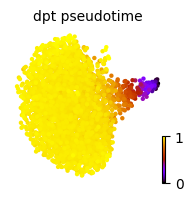

saving figure to file ./figures/scvelo_NR_DG_type.pdf


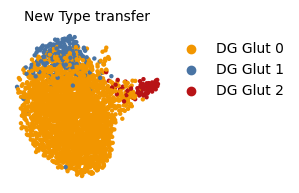

saving figure to file ./figures/scvelo_NR_DG_digital_layer.pdf


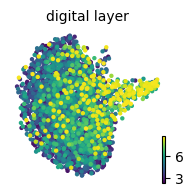

In [4]:
scv.pl.scatter(filtered_NR_DG_PC1, basis='umap',color='dpt_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),save='NR_DG_dpt.pdf')
scv.pl.scatter(filtered_NR_DG_PC1, basis='umap',color='New_Type_transfer',palette=["#f29600","#4974a4","#b81316"],figsize=(2,2),save='NR_DG_type.pdf')
scv.pl.scatter(filtered_NR_DG_PC1, basis='umap',color='digital_layer',figsize=(2,2),save='NR_DG_digital_layer.pdf')

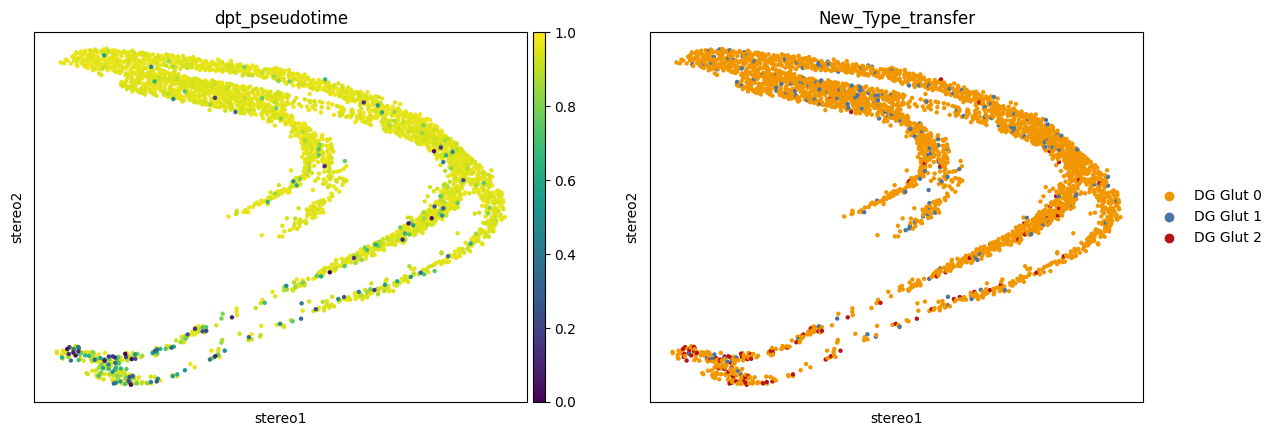

In [274]:
sc.pl.embedding(filtered_NR_DG_PC1, basis='stereo',color=['dpt_pseudotime','New_Type_transfer'],cmap='viridis',legend_loc='right margin')

In [5]:
sc.pp.pca(filtered_NR_DG_PC1)
adata = filtered_NR_DG_PC1
data_clusters = adata.obs['New_Type_transfer']
#data_clusters_set = set(data_clusters.values)
#zip_types = zip(sorted(data_clusters_set),range(len(data_clusters_set)))
#dict_types = dict(zip_types)
#cell_clusters  =  [dict_types[i] for i in data_clusters.values]
cell_clusters = list(data_clusters.values)
X_pca  = adata.obsm['X_pca']

In [7]:
filtered_NR_DG_PC1

AnnData object with n_obs × n_vars = 2998 × 782
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'dpt_pseudotime', 'highlight'
    uns: 'New_Type_transfer_colors', 'diffmap_evals', 'highlight_colors', 'iroot', 'neighbors', 'umap', 'pca'
    obsm: 'X_diffmap', 'X_stereo', 'X_umap', 'stereo', 'X_pca', 'DTNE'
    varm: 'PCs'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

In [56]:
# 将数据导出为 DataFrame，方便操作
df = filtered_NR_DG_PC1.obs[['dpt_pseudotime', 'New_Type_transfer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 为每个 Type_transfer 设定颜色（可以根据实际需要修改配色）
type_colors = {
    'DG Glut 0': "#f29600",  # 示例颜色
    'DG Glut 1': "#4974a4",
    'DG Glut 2': "#b81316"
}

# 为每个细胞匹配对应的颜色
df_sorted['color'] = df_sorted['New_Type_transfer'].map(type_colors)
color_rgb = np.array([mcolors.to_rgba(color) for color in df_sorted['color']])

# 将颜色数组 reshape 为 1 行
color_bar = colors[::-1].reshape(1,-1,4)  # 4 表示 RGBA 颜色通道

# 绘制条状图
plt.figure(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
plt.imshow(color_array, aspect="auto")
plt.axis("off")  # 去掉轴
plt.title("NR cells Sorted by DPT Pseudotime with New_Type_transfer Colors")
plt.show()
#output_path = "F:/spatial/HIP/figures/DG_HIP_NR_sorted_dpt_pseudotime.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()
#print(f"PDF saved as {output_path}")

AttributeError: 'list' object has no attribute 'reshape'

In [62]:
# 将数据导出为 DataFrame，方便操作
df = filtered_NR_DG_PC1.obs[['dpt_pseudotime', 'digital_layer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 创建一个黑白的 'Greys' 颜色映射用于图像
cmap_image = plt.cm.Greys  # 用于图像的黑白颜色映射
norm_image = mcolors.Normalize(vmin=df_sorted['digital_layer'].min(), vmax=df_sorted['digital_layer'].max())
colors_image = cmap_image(norm_image(df_sorted['digital_layer']))

# 正确地使用 colors_image 来 reshape
colors_arr = np.array(colors_image)[::-1]        # 转成数组并反转顺序
color_bar_image = colors_arr.reshape(1, -1, 4)   # 变成 (1, N, 4)

# 绘制条状图
fig, ax = plt.subplots(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
im = ax.imshow(color_bar_image, aspect="auto")  # 确保颜色条为黑白
ax.axis("off")  # 去掉轴
plt.title("NR cells spatial depth along Pseudotime")

# 创建反转的颜色映射用于图例
cmap_colorbar = plt.cm.Greys  # 使用 'Greys_r' 反转颜色映射
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm_image, cmap=cmap_colorbar), ax=ax, orientation="horizontal", pad=0.2)
cbar.set_label('Spatial Depth')  # 自定义颜色条标签
cbar.set_ticks([])  # 去掉颜色条上的数值

# 添加左右侧标签
cbar.ax.text(-0.15, 0.25, 'Dorsal', ha='center', va='center', transform=cbar.ax.transAxes, color='black')
cbar.ax.text(1.15, 0.25, 'Ventral', ha='center', va='center', transform=cbar.ax.transAxes, color='black')

#plt.show()
output_path = "F:/spatial/HIP/figures/DG_HIP_NR_sorted_dpt_pseudotime_cortical.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/DG_HIP_NR_sorted_dpt_pseudotime_cortical.pdf


In [16]:
DR1_2 =sc.read_h5ad('F:/spatial/HIP/DR1_2/spatial_transfer_digital_layer_15.h5ad')
DR2_2 =sc.read_h5ad('F:/spatial/HIP/DR2_2/spatial_transfer_digital_layer_15.h5ad')

In [31]:
DR1_2,DR2_2

(AnnData object with n_obs × n_vars = 11602 × 23857
     obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column'
     obsm: 'stereo'
     layers: 'imputed',
 AnnData object with n_obs × n_vars = 10452 × 24044
     obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column'
     obsm: 'stereo'
     layers: 'imputed')

In [32]:
DR = DR1_2.concatenate(DR2_2,batch_categories=['DR1_2', 'DR2_2'],batch_key='slice',index_unique=None,join='outer')

In [33]:
DR_DG = DR[DR.obs['Subclass_transfer']=='DG Glut']

In [34]:
DR_DG

View of AnnData object with n_obs × n_vars = 5375 × 25207
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice'
    obsm: 'stereo'
    layers: 'imputed'

In [35]:
DR_DGp = DR_DG[DR_DG.obs['digital_column'].between(4, 10)]

In [36]:
DR_DGsg=DR_DGp[DR_DGp.obs['area']=='DGsg']

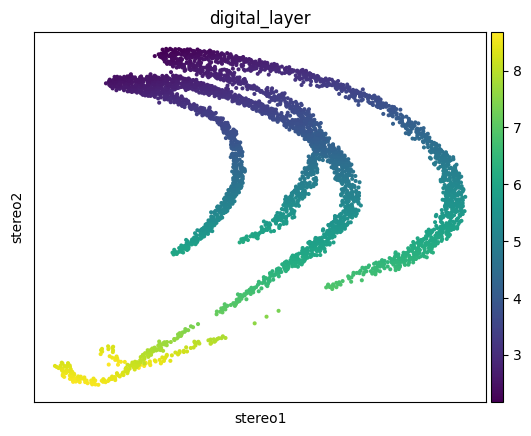

In [37]:
sc.pl.embedding(DR_DGsg, basis='stereo',color='digital_layer',alpha=None)

In [38]:
DR_HIP_DG_PC1gene = pd.read_csv('F:/spatial/HIP/HIP_DG_DR_PC1rank_new.csv',index_col='Gene')

In [39]:
DR_HIP_DG_PC1gene

Empty DataFrame
Columns: []
Index: [3300002A11Rik, 4932443L11Rik, Gm15398, A230006K03Rik, Glmn, Tshz2, Slc8a3, Gm43507, Pard3bos1, Tent5d, Dach1, Fam227a, Nwd2, 4930547E14Rik, Gm33228, Gm26954, Gm30094, Gm10135, Angptl3, Sox5, Reln, Gm10701, Hsd17b12, Gm45720, Gm49127, Tmcc3, Kcnip1, Pcdh15, Zfp808, Snrpn, Hpgds, Gm28198, Gm26542, Ring1, Gm26854, Mmp24, Car12, Slco2a1, Col11a1, Gm28750, Eps8, Filip1l, Gm29683, Ikbip, Nell1, Bach2, Camk2d, Gm16226, Fnbp1l, Anxa11os, Nr6a1, A530046M15Rik, Senp8, Wnt4, Gm4651, F13a1, 9530026P05Rik, Shc3, Gm17359, Fhad1, Smc1a, Dcun1d1, Gm20149, Hnmt, Nipsnap2, Hlf, Rbm4b, Steap2, Stmn2, Atp5b, Jmjd6, Gm43915, Gm16126, Ldb2, Car10, Pex1, Gm27008, Gm11867, Rorb, Cwf19l2, Sema3e, Cyp7b1, Rerg, Atp5f1, Rbms3, Phf6, Mal, Gm38604, Ptpn9, Gm50163, Slc30a3, Gm12353, Pacrg, Cntn6, Igsf8, Ptger4, Papss2, E530011L22Rik, Tgfb2, Vmp1, ...]

[903 rows x 0 columns]

In [40]:
adata_index =DR_DGsg.var.index.astype(str)

In [41]:
PC1_index =DR_HIP_DG_PC1gene.index.astype(str)

In [42]:
common_index  =PC1_index.intersection(adata_index)

In [43]:
common_index

Index(['3300002A11Rik', '4932443L11Rik', 'Gm15398', 'A230006K03Rik', 'Glmn',
       'Tshz2', 'Slc8a3', 'Gm43507', 'Pard3bos1', 'Dach1',
       ...
       'Tenm1', 'Mapk4', 'Sema6d', 'Egfem1', 'Trpc6', 'Ahcyl2', 'Slc4a4',
       'Ntng1', 'Nrg1', 'Nrxn3'],
      dtype='object', length=853)

In [44]:
DR_DG_PC1 =DR_DGsg[:,common_index]

In [45]:
# 备份原始数据的 X 矩阵
DR_DGsg.layers['original_X'] = DR_DGsg.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
DR_DGsg.X = DR_DGsg.layers['imputed'].copy()
DR_DGsg.X = np.nan_to_num(DR_DGsg.X, nan=0)

In [46]:
# 备份原始数据的 X 矩阵
DR_DG_PC1.layers['original_X'] = DR_DG_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
DR_DG_PC1.X = DR_DG_PC1.layers['imputed'].copy()
DR_DG_PC1.X = np.nan_to_num(DR_DG_PC1.X, nan=0)

In [225]:
# 备份原始数据的 X 矩阵
DR1_1_l23_PC1.layers['original_X'] = DR1_1_l23_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
DR1_1_l23_PC1.X = DR1_1_l23_PC1.layers['imputed'].copy()
DR1_1_l23_PC1.X = np.nan_to_num(DR1_1_l23_PC1.X, nan=0)

In [233]:
# 备份原始数据的 X 矩阵
DR2_1_l23_PC1.layers['original_X'] = DR2_1_l23_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
DR2_1_l23_PC1.X = DR2_1_l23_PC1.layers['imputed'].copy()
DR2_1_l23_PC1.X = np.nan_to_num(DR2_1_l23_PC1.X, nan=0)

In [80]:
# 若存在 NaN 值，可以用 0 填充，或其他适合的值
DR_DG.X = np.nan_to_num(DR_DG.X, nan=0)

In [81]:
DR_DG_PC1.X = np.nan_to_num(DR_DG_PC1.X, nan=0)

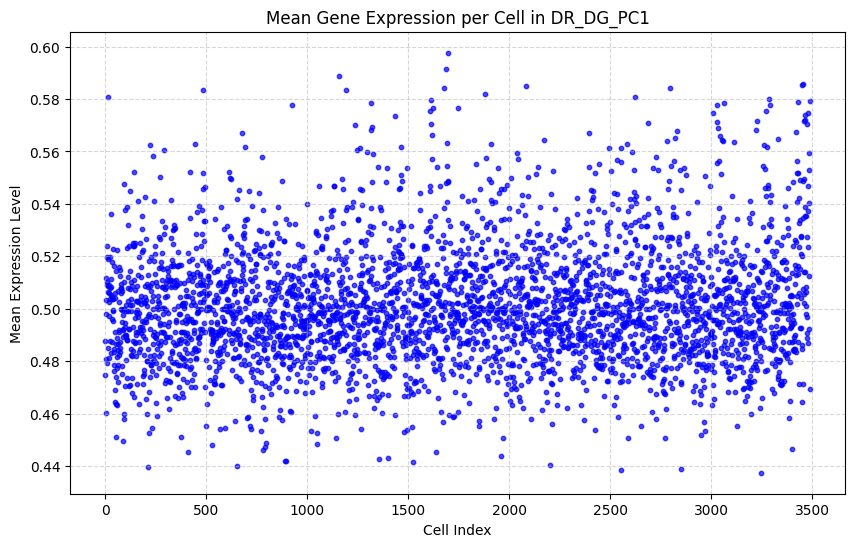

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = DR_DG_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in DR_DG_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [48]:
DR_DGsg = DR_DGsg[~DR_DGsg.obs.index.duplicated(keep='first')]
DR_DG_PC1 = DR_DG_PC1[~DR_DG_PC1.obs.index.duplicated(keep='first')]

In [49]:
# Step 1: 获取基因表达数据
g = DR_DG_PC1.X.mean(axis=1).flatten()

# Step 2: 计算 vmin 和 vmax
vmin, vmax = np.percentile(g, 1), np.percentile(g, 99)

# Step 3: 创建布尔掩码
mask = (g >= vmin) & (g <= vmax)

# Step 4: 提取满足条件的细胞
filtered_DR_DG_PC1 = DR_DG_PC1[mask]
removed_cells = DR_DG_PC1.obs.index[~mask]  # 获取被移除的细胞索引

# Step 5: 确保索引对齐并在 DR_DGsg 中去掉相同细胞
common_indices = DR_DGsg.obs.index.intersection(DR_DG_PC1.obs.index)  # 获取共享索引
filtered_DR_DGsg = DR_DGsg[common_indices]  # 首先确保索引对齐
filtered_DR_DGsg = filtered_DR_DGsg[~filtered_DR_DGsg.obs.index.isin(removed_cells)]  # 再移除细胞

# 打印结果
print(f"原始 DR_DG_PC1 细胞数: {DR_DG_PC1.n_obs}, 筛选后: {filtered_DR_DG_PC1.n_obs}")
print(f"原始 DR_DGsg 细胞数: {DR_DGsg.n_obs}, 筛选后: {filtered_DR_DGsg.n_obs}")


原始 DR_DG_PC1 细胞数: 3336, 筛选后: 3268
原始 DR_DGsg 细胞数: 3336, 筛选后: 3268


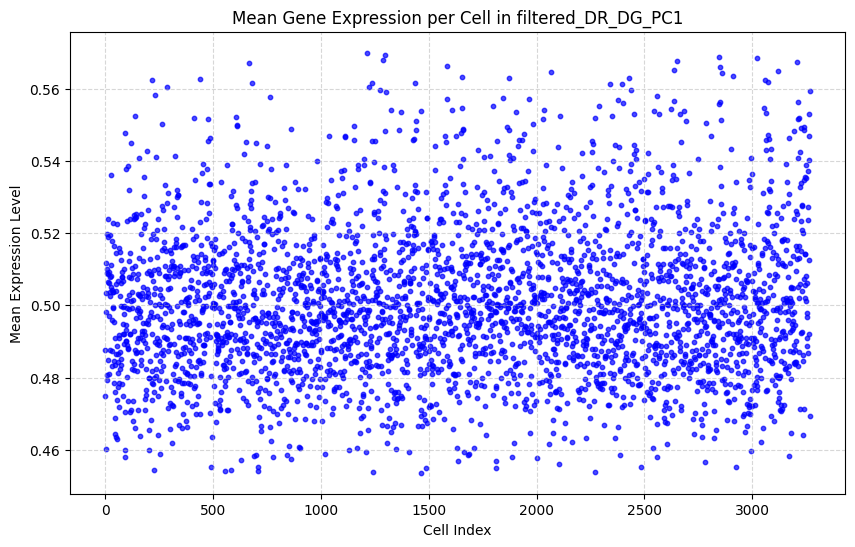

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = filtered_DR_DG_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in filtered_DR_DG_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


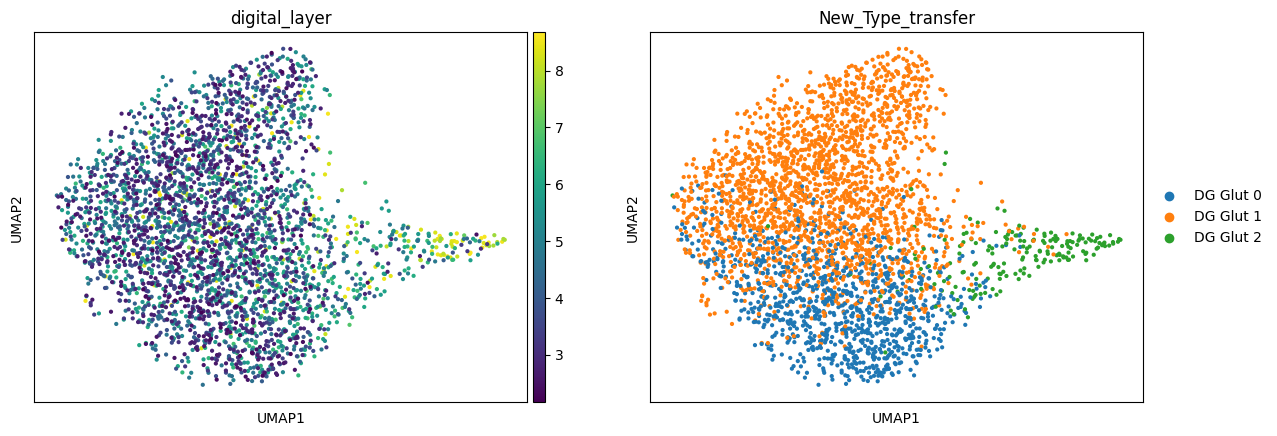

In [300]:
sc.pp.neighbors(filtered_DR_DG_PC1, use_rep="X")
sc.tl.umap(filtered_DR_DG_PC1)
sc.tl.diffmap(filtered_DR_DG_PC1)
sc.pl.umap(filtered_DR_DG_PC1,color=['digital_layer','New_Type_transfer'])

In [174]:
D_l23_umapx = DR_l23_PC1.obsm['X_umap'][:,0]
D_l23_umap

array([ 5.6121478e+00,  7.2818124e-01, -4.2253613e-01, ...,
        1.5657728e+00,  1.2542317e+00,  5.2270433e-03], dtype=float32)

In [175]:
D_l23_umapx[210]

4.0313797

In [303]:
filtered_DR_DG_PC1[filtered_DR_DG_PC1.obs.index[1290]].obs 

orig.ident  nCount_Spatial  nFeature_Spatial  area  coor_x  coor_y  \
28368    Spatial           137.0               103  DGsg   13709   18792   

            areaL1     coor_x_ad    coor_y_ad left_right  ...   ident  \
28368  Hippocampus  11013.731947  2972.688816      right  ...  region   

      integration_partition_transfer integration_partition_confidence  \
28368                            p99                         0.865795   

       Subclass_transfer Subclass_confidence  New_Type_transfer  \
28368            DG Glut                 1.0          DG Glut 2   

      New_Type_confidence  digital_layer  digital_column  slice  
28368            0.774978       7.861973        7.301944  DR1_2  

[1 rows x 21 columns]

In [217]:
np.where((D_l23_umapx >= 5.5) & (D_l23_umapx <= 5.9) & (D_l23_umap <= -2.3))

(array([], dtype=int64),)

In [213]:
DR_l23_PC1[DR_l23_PC1.obs.index[861]].obs 

orig.ident  nCount_Spatial  nFeature_Spatial      area  coor_x  coor_y  \
14747    Spatial           598.0               339  VISp-L23   11620   15828   

      areaL1  coor_x_ad  coor_y_ad left_right  ...  \
14747     V1    12365.0    11048.0      right  ...   

      integration_partition_confidence Subclass_transfer Subclass_confidence  \
14747                          0.64897       L2/3 IT CTX                 1.0   

       Type_transfer Type_confidence  digital_layer  slice  leiden  highlight  \
14747  L2/3 IT CTX B        0.776421       2.130415  DR2_2       1      False   

      dpt_pseudotime  
14747        0.83543  

[1 rows x 23 columns]

In [304]:
filtered_DR_DG_PC1.uns['iroot'] = np.flatnonzero(filtered_DR_DG_PC1.obs.index  == '28368')[0]
sc.tl.dpt(filtered_DR_DG_PC1)

In [305]:
filtered_DR_DG_PC1.write_h5ad('filtered_DR_DG_PC1_spatial_15.h5ad')

In [63]:
filtered_DR_DG_PC1=sc.read_h5ad('filtered_DR_DG_PC1_spatial_15.h5ad')

In [61]:
filtered_DR_DG_PC1

AnnData object with n_obs × n_vars = 3268 × 853
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'dpt_pseudotime'
    uns: 'New_Type_transfer_colors', 'diffmap_evals', 'iroot', 'neighbors', 'umap'
    obsm: 'X_diffmap', 'X_umap', 'stereo'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

saving figure to file ./figures/scvelo_DG_DR_dpt.pdf


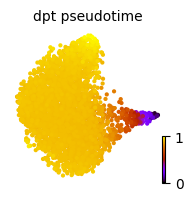

saving figure to file ./figures/scvelo_DG_DR_type.pdf


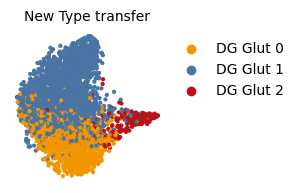

saving figure to file ./figures/scvelo_DG_DR_digital_layer.pdf


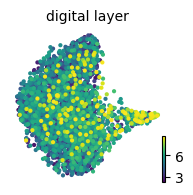

In [9]:
scv.pl.scatter(filtered_DR_DG_PC1, basis='X_umap',color='dpt_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),save='DG_DR_dpt.pdf')
scv.pl.umap(filtered_DR_DG_PC1, color='New_Type_transfer',palette=["#f29600","#4974a4","#b81316"],figsize=(2,2),save='DG_DR_type.pdf')
scv.pl.umap(filtered_DR_DG_PC1, color='digital_layer',figsize=(2,2),save='DG_DR_digital_layer.pdf')

In [20]:
sc.pp.pca(filtered_DR_DG_PC1)
adata = filtered_DR_DG_PC1
data_clusters = adata.obs['New_Type_transfer']
#data_clusters_set = set(data_clusters.values)
#zip_types = zip(sorted(data_clusters_set),range(len(data_clusters_set)))
#dict_types = dict(zip_types)
#cell_clusters  =  [dict_types[i] for i in data_clusters.values]
cell_clusters = list(data_clusters.values)
X_pca  = adata.obsm['X_pca']

In [21]:
filtered_DR_DG_PC1

AnnData object with n_obs × n_vars = 3268 × 853
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'dpt_pseudotime'
    uns: 'New_Type_transfer_colors', 'diffmap_evals', 'iroot', 'neighbors', 'umap', 'pca'
    obsm: 'X_diffmap', 'X_umap', 'stereo', 'X_pca'
    varm: 'PCs'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

In [10]:
# 将数据导出为 DataFrame，方便操作
df = filtered_DR_DG_PC1.obs[['dpt_pseudotime', 'New_Type_transfer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 为每个 Type_transfer 设定颜色（可以根据实际需要修改配色）
type_colors = {
    'DG Glut 0': "#f29600",  # 示例颜色
    'DG Glut 1': "#4974a4",
    'DG Glut 2': "#b81316"
}

# 为每个细胞匹配对应的颜色
df_sorted['color'] = df_sorted['New_Type_transfer'].map(type_colors)
color_rgb = np.array([mcolors.to_rgba(color) for color in df_sorted['color']])

# 将颜色数组 reshape 为 1 行
color_array = color_rgb.reshape(1, -1, 4)  # 4 表示 RGBA 颜色通道

# 绘制条状图
plt.figure(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
plt.imshow(color_array, aspect="auto")
plt.axis("off")  # 去掉轴
plt.title("DR cells Sorted by DPT Pseudotime with Type_transfer Colors")
#plt.show()
output_path = "F:/spatial/HIP/figures/DG_HIP_DR_sorted_dpt_pseudotime.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/DG_HIP_DR_sorted_dpt_pseudotime.pdf


In [67]:
# 将数据导出为 DataFrame，方便操作
df = filtered_DR_DG_PC1.obs[['dpt_pseudotime', 'digital_layer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 创建一个黑白的 'Greys' 颜色映射用于图像
cmap_image = plt.cm.Greys  # 用于图像的黑白颜色映射
norm_image = mcolors.Normalize(vmin=df_sorted['digital_layer'].min(), vmax=df_sorted['digital_layer'].max())
colors_image = cmap_image(norm_image(df_sorted['digital_layer']))

# 正确地使用 colors_image 来 reshape
colors_arr = np.array(colors_image)[::-1]        # 转成数组并反转顺序
color_bar_image = colors_arr.reshape(1, -1, 4)   # 变成 (1, N, 4)

# 绘制条状图
fig, ax = plt.subplots(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
im = ax.imshow(color_bar_image, aspect="auto")  # 确保颜色条为黑白
ax.axis("off")  # 去掉轴
plt.title("DR cells spatial depth along Pseudotime")

# 创建反转的颜色映射用于图例
cmap_colorbar = plt.cm.Greys  # 使用 'Greys' 反转颜色映射
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm_image, cmap=cmap_colorbar), ax=ax, orientation="horizontal", pad=0.2)
cbar.set_label('Spatial Depth')  # 自定义颜色条标签
cbar.set_ticks([])  # 去掉颜色条上的数值

# 添加左右侧标签
cbar.ax.text(-0.15, 0.25, 'Dorsal', ha='center', va='center', transform=cbar.ax.transAxes, color='black')
cbar.ax.text(1.15, 0.25, 'Ventral', ha='center', va='center', transform=cbar.ax.transAxes, color='black')

#plt.show()
output_path = "F:/spatial/HIP/figures/DG_HIP_DR_sorted_dpt_pseudotime_cortical.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/DG_HIP_DR_sorted_dpt_pseudotime_cortical.pdf


In [21]:
sc.pp.pca(filtered_NR_DG_PC1)

AttributeError: 'PathCollection' object has no attribute 'pp'

In [9]:
filtered_NR_DG_PC1.obs['PC1']= filtered_NR_DG_PC1.obsm['X_pca'][:,0]

In [10]:
filtered_NR_DG_PC1

AnnData object with n_obs × n_vars = 2998 × 782
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'dpt_pseudotime', 'highlight', 'PC1'
    uns: 'New_Type_transfer_colors', 'diffmap_evals', 'highlight_colors', 'iroot', 'neighbors', 'umap', 'pca'
    obsm: 'X_diffmap', 'X_stereo', 'X_umap', 'stereo', 'X_pca'
    varm: 'PCs'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

In [68]:
filtered_NR_DG_PC1.write_h5ad('filtered_NR_DG_PC1.h5ad')

In [11]:
filtered_NR_DG_PC1=sc.read_h5ad('filtered_NR_DG_PC1.h5ad')

In [4]:
filtered_NR_DG_PC1_2 = filtered_NR_DG_PC1[filtered_NR_DG_PC1.obs['slice']=='NR1_2']

filtered_NR_DG_PC2_2 = filtered_NR_DG_PC1[filtered_NR_DG_PC1.obs['slice']=='NR2_2']

In [5]:
filtered_NR_DG_PC1_2.obs['New_Type_transfer']

81822     DG Glut 0
81823     DG Glut 0
81824     DG Glut 0
81826     DG Glut 0
81828     DG Glut 0
            ...    
101272    DG Glut 0
101275    DG Glut 0
101295    DG Glut 0
101296    DG Glut 0
101297    DG Glut 0
Name: New_Type_transfer, Length: 1718, dtype: category
Categories (3, object): ['DG Glut 0', 'DG Glut 1', 'DG Glut 2']

In [137]:
filtered_NR_DG_PC2_2.obsm['stereo']

ArrayView([[11152.35257559,  2587.01717541],
           [11053.22250742,  2703.62862247],
           [11059.95174181,  2682.85081208],
           ...,
           [13330.1008044 ,  6586.45584252],
           [13340.0471186 ,  6616.82146179],
           [13351.64640371,  6571.19847871]])

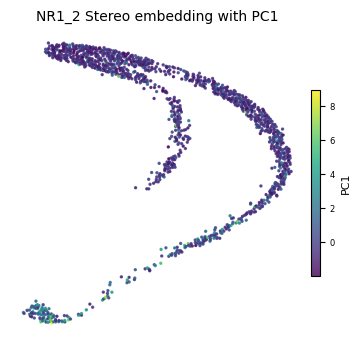

In [6]:
import matplotlib.pyplot as plt

# 获取嵌入坐标和颜色数据
coords = filtered_NR_DG_PC2_2.obsm['stereo']
color = filtered_NR_DG_PC2_2.obs['PC1']

# 创建绘图
fig, ax = plt.subplots(figsize=(4, 4))

# 绘制散点图
scatter = ax.scatter(coords[:, 0], coords[:, 1], c=color, cmap='viridis', s=2, alpha=0.8)

# 取消坐标轴
ax.axis('off')

# 添加 colorbar，并调整位置到右下角
cbar = fig.colorbar(scatter, ax=ax, fraction=0.03, pad=0.02, location='right')
cbar.ax.tick_params(labelsize=6)  # 调整 colorbar 字体大小
cbar.set_label('PC1', fontsize=8)  # 设置 colorbar 标签

# 设置标题
plt.title('NR1_2 Stereo embedding with PC1', fontsize=10)

# 显示图像
plt.show()


In [23]:
sc.pp.pca(filtered_DR_DG_PC1)

In [25]:
filtered_DR_DG_PC1.write_h5ad('filtered_DR_DG_PC1.h5ad')

In [12]:
filtered_DR_DG_PC1=sc.read_h5ad('filtered_DR_DG_PC1.h5ad')

In [24]:
filtered_DR_DG_PC1.obs['PC1']= filtered_DR_DG_PC1.obsm['X_pca'][:,0]

In [9]:
filtered_DR_DG_PC1_2 = filtered_DR_DG_PC1[filtered_DR_DG_PC1.obs['slice']=='DR1_2']

filtered_DR_DG_PC2_2 = filtered_DR_DG_PC1[filtered_DR_DG_PC1.obs['slice']=='DR2_2']

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


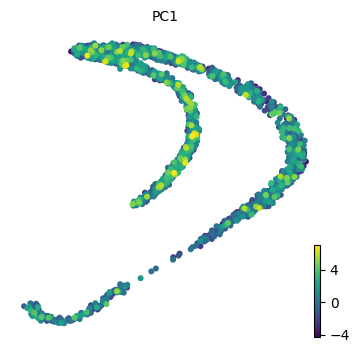

In [10]:
scv.pl.scatter(filtered_DR_DG_PC2_2, basis='stereo',color='PC1',cmap='viridis',legend_loc='right margin',figsize=(4,4))

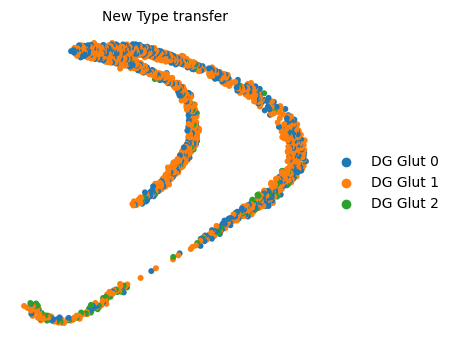

In [11]:
scv.pl.scatter(filtered_DR_DG_PC2_2, basis='stereo',color='New_Type_transfer',cmap='viridis',legend_loc='right margin',figsize=(4,4))

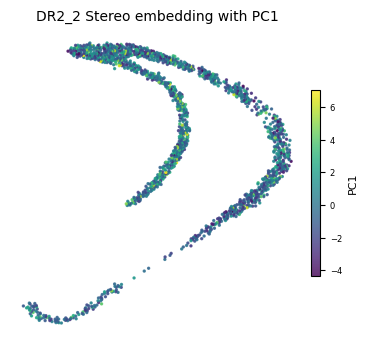

In [13]:
import matplotlib.pyplot as plt

# 获取嵌入坐标和颜色数据
coords = filtered_DR_DG_PC2_2.obsm['stereo']
color = filtered_DR_DG_PC2_2.obs['PC1']

# 创建绘图
fig, ax = plt.subplots(figsize=(4, 4))

# 绘制散点图
scatter = ax.scatter(coords[:, 0], coords[:, 1], c=color, cmap='viridis', s=2, alpha=0.8)

# 取消坐标轴
ax.axis('off')

# 添加 colorbar，并调整位置到右下角
cbar = fig.colorbar(scatter, ax=ax, fraction=0.03, pad=0.02, location='right')
cbar.ax.tick_params(labelsize=6)  # 调整 colorbar 字体大小
cbar.set_label('PC1', fontsize=8)  # 设置 colorbar 标签

# 设置标题
plt.title('DR2_2 Stereo embedding with PC1', fontsize=10)

# 显示图像
plt.show()


In [12]:
DG_PC1 = NR_DG_PC1.concatenate(DR_DG_PC1,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

NameError: name 'NR_DG_PC1' is not defined

In [105]:
DG_PC1.write_h5ad('DG_PC1.h5ad')

In [69]:
DG_PC1=sc.read_h5ad('DG_PC1.h5ad')

In [3]:
DG_PC1_df = pd.read_csv('F:/spatial/HIP/HIP_DG_Lasso_PC1rank_new.xls', sep='\t')

In [4]:
RP_gene_order_df = pd.read_csv('F:/spatial/HIP/HIP_DG_RCG_pos_ordered.xls', sep='\t')
RN_gene_order_df = pd.read_csv('F:/spatial/HIP/HIP_DG_RCG_neg_ordered.xls', sep='\t')
NRP_gene_order_df = pd.read_csv('F:/spatial/HIP/HIP_DG_Non_RCG_pos_ordered.xls', sep='\t')
NRN_gene_order_df = pd.read_csv('F:/spatial/HIP/HIP_DG_Non_RCG_neg_ordered.xls', sep='\t')

In [5]:
RP_gene_order_list = RP_gene_order_df['Gene'].tolist()
RN_gene_order_list = RN_gene_order_df['Gene'].tolist()
NRP_gene_order_list = NRP_gene_order_df['Gene'].tolist()
NRN_gene_order_list = NRN_gene_order_df['Gene'].tolist()

In [26]:
filtered_DG_PC1 = filtered_NR_DG_PC1.concatenate(filtered_DR_DG_PC1,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [17]:
filtered_DG_PC1.write_h5ad('filtered_DG_PC1.h5ad')

In [19]:
filtered_DR_DG_PC1

AnnData object with n_obs × n_vars = 3268 × 853
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'dpt_pseudotime'
    uns: 'New_Type_transfer_colors', 'diffmap_evals', 'iroot', 'neighbors', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap', 'stereo'
    varm: 'PCs'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scvelo as scv

# 假设数据已经加载到 adata 中
adata = filtered_DG_PC1

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# Step 1: 分别展示每个 slice 的散点图，并设置对应 colorbar 的最大值和最小值
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 更大的图尺寸以适应所有子图

for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 计算当前 slice 的 PC1 的最小值和最大值
    pc1_slice_min = subset.obs['PC1'].min()
    pc1_slice_max = subset.obs['PC1'].max()
    
    # 手动绘制散点图，设置 colorbar 范围为该 slice 的 PC1 最小值和最大值
    sc = ax.scatter(subset.obsm['stereo'][:, 0], subset.obsm['stereo'][:, 1], 
                    c=subset.obs['PC1'], cmap='viridis', vmin=pc1_slice_min, vmax=pc1_slice_max, s=5)
    ax.set_title(slice_category)
    
    # 获取 colorbar 对象并将其放置到右下角，缩小 colorbar
    cbar = fig.colorbar(sc, ax=ax, orientation='vertical', pad=0.05, shrink=0.6)
    cbar.set_label('PC1', fontsize=12)
    
    # 隐藏坐标轴
    ax.axis('off')  # 去掉坐标轴

# 调整子图布局
plt.tight_layout()

# 显示图形
#plt.show()
output_path = "F:/spatial/HIP/figures/HIP_DG_PC1.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/HIP_DG_PC1.pdf


In [30]:
sns.kdeplot(
    data=filtered_NR_DG_PC1.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 8.0), (-4, 4)))
plt.text(0.95, 0.95, 'NR', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
#plt.show()
output_path = "F:/spatial/HIP/figures/HIP_NR_DG_digital_layer&PC1.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/HIP_NR_DG_digital_layer&PC1.pdf


In [32]:
sns.kdeplot(
    data=filtered_DR_DG_PC1.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 8.0), (-4, 4)))
plt.text(0.95, 0.95, 'DR', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
#plt.show()
output_path = "F:/spatial/HIP/figures/HIP_DR_DG_digital_layer&PC1.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/HIP_DR_DG_digital_layer&PC1.pdf


In [96]:
filtered_NR_DG_PC1

AnnData object with n_obs × n_vars = 2998 × 782
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'dpt_pseudotime', 'highlight', 'PC1'
    uns: 'New_Type_transfer_colors', 'diffmap_evals', 'highlight_colors', 'iroot', 'neighbors', 'umap', 'pca'
    obsm: 'X_diffmap', 'X_stereo', 'X_umap', 'stereo', 'X_pca'
    varm: 'PCs'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 数据准备
adata = DG_PC1
adata.X = np.nan_to_num(adata.X)

# 定义基因集
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        DG_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
n_rows, n_cols = len(genesets), len(slice_categories)

# 创建绘图布局
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 5 * n_rows))

for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    if not geneset:
        for ax in axs[row_idx, :]:
            ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 vmin, vmax 和 g_min, g_max
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)  # vmin 和 vmax 为数据的最小值和最大值
            g_clipped = np.clip(g, vmin, vmax)  # 将数据限制在 vmin 和 vmax 范围内
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)  # 归一化到 [0, 1]
            slice_g_values[slice_category] = (g_norm, slice_data.obsm['stereo'][:, 0], slice_data.obsm['stereo'][:, 1])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]  # 基准 slice 的 g_min 和 g_max

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x, y = slice_g_values.get(slice_category, (None, None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 缩放公式
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x, y)

    # Step 4: 绘制每个 slice 的图
    for col_idx, slice_category in enumerate(slice_categories):
        ax = axs[row_idx, col_idx]
        adjusted_g, x, y = adjusted_g_values.get(slice_category, (None, None, None))

        if adjusted_g is None:
            ax.axis("off")
            continue

        # 绘制散点图，使用基准 slice 的颜色范围 [0, 1]
        scatter = ax.scatter(
            x, y,
            c=adjusted_g, cmap='seismic', s=10, alpha=1.0, vmin=0, vmax=1
        )

        # 设置标题
#        ax.set_title(f"{slice_category} - {geneset_name}", fontsize=10)
        ax.axis("off")

# 添加全局颜色条
#cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [左, 下, 宽度, 高度]
#cbar = fig.colorbar(
#    plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap='seismic'),
#    cax=cbar_ax,
#    orientation='horizontal'
#)
#cbar.set_label('Gene Expression (Adjusted)', fontsize=12)

# 添加总标题并调整位置
#plt.suptitle("Gene Expression with Slice-wise Clipping and Scaling (5%-95%)", fontsize=16, y=0.97)
plt.subplots_adjust(top=0.9, bottom=0.1)  # 调整布局，避免重叠
#plt.show()

output_path = "F:/spatial/HIP/figures/HIP_DG_adjusted_g.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/HIP/figures/HIP_DG_adjusted_g.pdf


In [150]:
def find_gene_sets(gene_name, genesets):
    """
    返回所有包含 gene_name 的 geneset 名称列表。
    """
    hits = []
    for set_name, gene_list in genesets.items():
        if gene_name in gene_list:
            hits.append(set_name)
    return hits

# 示例：查看 Pcdh15 属于哪些 geneset
gene_to_check = "Smad3"
sets_containing = find_gene_sets(gene_to_check, genesets)
if sets_containing:
    print(f"基因 {gene_to_check} 所在的 geneset：{sets_containing}")
else:
    print(f"基因 {gene_to_check} 未出现在任何指定的 geneset 中。")


基因 Smad3 所在的 geneset：['RN_pos']


In [71]:
 DG_PC1

AnnData object with n_obs × n_vars = 6445 × 1124
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'condition'
    obsm: 'X_stereo', 'stereo'
    layers: 'imputed', 'original_X'

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
# 数据准备
adata = DG_PC1
adata.X = np.nan_to_num(adata.X)

# 定义基因集
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        DG_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建 1列8行的图形布局
fig, axs = plt.subplots(8, 1, figsize=(4, 4 * len(genesets)), constrained_layout=True)

# 为每个 geneset 绘制一个折线图
for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    ax = axs[row_idx]  # 获取子图

    if not geneset:
        ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 g 值并缩放
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)
            g_clipped = np.clip(g, vmin, vmax)
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)
            slice_g_values[slice_category] = (g_norm, slice_data.obs['digital_layer'])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x = slice_g_values.get(slice_category, (None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 使用基准 slice 的缩放公式调整 g 值
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x)

    # Step 4: 合并 NR 和 DR 数据
    nr_g_values = []
    nr_x_values = []
    dr_g_values = []
    dr_x_values = []

    for slice_category in ['NR1_2', 'NR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            nr_g_values.append(g)
            nr_x_values.append(x)

    for slice_category in ['DR1_2', 'DR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            dr_g_values.append(g)
            dr_x_values.append(x)

    if nr_g_values:
        nr_g_values = np.concatenate(nr_g_values)
        nr_x_values = np.concatenate(nr_x_values)

    if dr_g_values:
        dr_g_values = np.concatenate(dr_g_values)
        dr_x_values = np.concatenate(dr_x_values)

    smooth_frac = 0.66  # 越大曲线越平滑
    
    # Step 5: 绘制综合后的折线图
    for g_values, x_values, color, label in zip(
        [nr_g_values, dr_g_values],
        [nr_x_values, dr_x_values],
        sns.color_palette()[:2],
        ['NR', 'DR']
    ):
        if g_values.size > 0:
            bins = np.arange(min(x_values), max(x_values), 0.5)
            bin_centers = 0.5 * (bins[1:] + bins[:-1])

            # 计算每个 bin 的均值和标准差
            binned_means = [np.mean(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                            for i in range(len(bins) - 1)]
            binned_std = [np.std(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                          for i in range(len(bins) - 1)]

            # LOWESS 会返回和 bin_centers 对应长度的平滑值
            means_smooth = lowess(
                       binned_means, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )
            std_smooth = lowess(
                       binned_std, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )

            # 绘制平滑后的曲线
            ax.plot(bin_centers, means_smooth, color=color, label=label)

            # 绘制阴影：用平滑后的标准差 * 0.05
            ax.fill_between(
                 bin_centers,
                 means_smooth - std_smooth * 0.05,
                 means_smooth + std_smooth * 0.05,
                 color=color, alpha=0.1
             )

    # 设置图标题和标签
    ax.set_title(f"{geneset_name}", fontsize=14)
    ax.set_xlabel('Digital Layer', fontsize=12)
    ax.set_ylabel('Normalized Gene Expression', fontsize=12)

    ax.legend(title="Conditions", fontsize=10, loc="upper right")

# 添加总标题
plt.suptitle("Line Plots of Gene Expression across Conditions", fontsize=16, y=1.02)
#plt.show()
output_path = "F:/spatial/HIP/figures/HIP_DG_adjusted_g_lineplot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/HIP_DG_adjusted_g_lineplot.pdf


In [50]:
filtered_DGsg = filtered_NR_DGsg.concatenate(filtered_DR_DGsg,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [34]:
filtered_DGsg.write_h5ad('filtered_DGsg.h5ad')

NameError: name 'filtered_DGsg' is not defined

In [35]:
import scanpy as sc
filtered_DGsg=sc.read_h5ad('filtered_DGsg.h5ad')

In [65]:
filtered_DGsg

AnnData object with n_obs × n_vars = 6313 × 27103
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'condition'
    obsm: 'stereo'
    layers: 'imputed', 'original_X'

In [29]:
DG_marker = pd.read_csv('F:/spatial/HIP/DG_all_marker_class_exp.xls', sep='\t',index_col='Gene')

In [30]:
DG_marker

Unnamed: 0        Class       Type  NR DG Glut 0  NR DG Glut 1  \
Gene                                                                            
Slc4a4                  0       Common  DG Glut 0      1.975416      1.131062   
Trpc5                   1       Common  DG Glut 0      0.638762      0.262461   
Gm15680                 2       Common  DG Glut 0      0.548233      0.277594   
Ryr1                    3       Common  DG Glut 0      0.215711      0.045030   
Dsp                     4       Common  DG Glut 0      0.204445      0.067713   
...                   ...          ...        ...           ...           ...   
Kirrel3os             784  NR_specific  DG Glut 2      0.042958      0.044265   
Slc6a7                785  NR_specific  DG Glut 2      0.026746      0.032800   
A230009B12Rik         786  NR_specific  DG Glut 2      0.053432      0.050152   
Fbxo16                787  NR_specific  DG Glut 2      0.052015      0.051791   
Map3k14               788  NR_specific  DG Glut 2      0.032306      0.029561   

               NR DG Glut 2  DR DG Glut 0  DR DG Glut 1  DR DG Glut 2  
Gene                                                                   
Slc4a4             1.433027      2.386884      1.618819      1.873530  
Trpc5              0.432727      0.971515      0.433575      0.680642  
Gm15680            0.187150      0.880652      0.515492      0.512348  
Ryr1               0.113331      0.355870      0.133552      0.280177  
Dsp                0.059953      0.358314      0.190490      0.172066  
...                     ...           ...           ...           ...  
Kirrel3os          0.097555      0.061411      0.056695      0.084639  
Slc6a7             0.076795      0.049775      0.040730      0.078286  
A230009B12Rik      0.111266      0.048205      0.061221      0.099988  
Fbxo16             0.110209      0.061870      0.061110      0.103139  
Map3k14            0.079828      0.038038      0.040264      0.057254  

[952 rows x 9 columns]

In [31]:
# 创建一个空字典来存储基因集
gene_sets = {}

# 选择Class和Type列
DG_marker_subset = DG_marker[['Class', 'Type']]

# 定义一个函数来获取Class列交集的基因
def get_gene_set(class_values, type_value):
    """
    从DataFrame中获取Class列值在class_values列表中，并且Type列为type_value的基因。
    """
    return DG_marker_subset[(DG_marker_subset['Class'].isin(class_values)) & (DG_marker_subset['Type'] == type_value)].index.tolist()

# 创建6个基因集
# 对于 NR_A, NR_B, NR_C：Class列是 Common + NR_specific，Type列是 A, B, C
for type_value in ['DG Glut 0', 'DG Glut 1', 'DG Glut 2']:
    gene_sets[f"NR_{type_value}"] = get_gene_set(class_values=['Common', 'NR_specific'], type_value=type_value)

# 对于 DR_A, DR_B, DR_C：Class列是 Common + DR_specific，Type列是 A, B, C
for type_value in ['DG Glut 0', 'DG Glut 1', 'DG Glut 2']:
    gene_sets[f"DR_{type_value}"] = get_gene_set(class_values=['Common', 'DR_specific'], type_value=type_value)

# 查看生成的基因集
for gene_set, genes in gene_sets.items():
    print(f"Gene set {gene_set} contains {len(genes)} genes: {genes[:5]}...")  # 显示前5个基因名称



Gene set NR_DG Glut 0 contains 128 genes: ['Slc4a4', 'Trpc5', 'Gm15680', 'Ryr1', 'Dsp']...
Gene set NR_DG Glut 1 contains 105 genes: ['Nrxn3', 'Nrg1', 'Ntng1', 'Trpc6', 'Mapk4']...
Gene set NR_DG Glut 2 contains 427 genes: ['Tenm2', 'Trpm3', 'Cdh13', 'Tenm4', 'Sgcz']...
Gene set DR_DG Glut 0 contains 53 genes: ['Slc4a4', 'Trpc5', 'Gm15680', 'Ryr1', 'Dsp']...
Gene set DR_DG Glut 1 contains 156 genes: ['Nrxn3', 'Nrg1', 'Ntng1', 'Trpc6', 'Mapk4']...
Gene set DR_DG Glut 2 contains 392 genes: ['Tenm2', 'Trpm3', 'Cdh13', 'Tenm4', 'Sgcz']...


In [61]:
# 创建一个ExcelWriter对象，指定保存的文件名
with pd.ExcelWriter("gene_sets.xlsx") as writer:
    # 对每个基因集，分别保存为一个工作表
    for key, gene_set in gene_sets.items():
        # 将每个基因集转换为DataFrame并写入对应的工作表
        df = pd.DataFrame(gene_set, columns=["Gene"])
        df.to_excel(writer, sheet_name=key, index=False)

print("Gene sets have been saved to 'gene_sets.xlsx'.")

Gene sets have been saved to 'gene_sets.xlsx'.


In [149]:
import matplotlib.pyplot as plt
import numpy as np
# 设置切片
slices = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
slice_gene_sets = {
    'NR1_2': ['NR_DG Glut 0', 'NR_DG Glut 1', 'NR_DG Glut 2'],
    'NR2_2': ['NR_DG Glut 0', 'NR_DG Glut 1', 'NR_DG Glut 2'],
    'DR1_2': ['DR_DG Glut 0', 'DR_DG Glut 1', 'DR_DG Glut 2'],
    'DR2_2': ['DR_DG Glut 0', 'DR_DG Glut 1', 'DR_DG Glut 2']
}

# 创建一个4列3行的子图布局
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))
axes = axes.flatten()  # 将二维数组展平，方便索引

# 创建一个列表用于保存所有表达量，用于colorbar
all_expression_values = []

# 为了存储所有归一化后的表达量，我们需要一个字典
normalized_expression_dict = {}

for col_idx, slice_type in enumerate(slices):
    gene_sets_for_slice = slice_gene_sets[slice_type]
    slice_data = filtered_DGsg[filtered_DGsg.obs['slice'] == slice_type]
    
    for row_idx, gene_set_name in enumerate(gene_sets_for_slice):
        gene_set = gene_sets[gene_set_name]
        common_genes = list(set(gene_set) & set(slice_data.var_names))
        if not common_genes:
            continue
        
        sub = slice_data[:, common_genes]
        expr = sub.X.mean(axis=1).flatten()
        vmin = np.percentile(expr, 5)
        vmax = np.percentile(expr, 95)
        expr_clipped = np.clip(expr, vmin, vmax)
        
        coords = sub.obsm['stereo']  # shape = (n_cells, 2)
        
        # ===== 这里开始按表达值排序 =====
        order = np.argsort(expr_clipped)
        x_sorted = coords[order, 0]
        y_sorted = coords[order, 1]
        expr_sorted = expr_clipped[order]
        # ===== 排序结束，保证“蓝色点”先画，“红色点”后画 =====
        
        ax = axes[row_idx * 4 + col_idx]
        ax.scatter(
            x_sorted, 
            y_sorted, 
            c=expr_sorted,
            cmap='coolwarm',
            s=2,
            vmin=vmin, vmax=vmax
        )
        ax.axis('off')
        all_expression_values.extend(expr_clipped)

# 添加colorbar
#cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.02])  # 重新调整colorbar的位置，使其不重叠
#norm = plt.Normalize(vmin=np.percentile(all_expression_values, 5), vmax=np.percentile(all_expression_values, 95))  # 设置colorbar的范围为5%-95%
#cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='coolwarm', norm=norm), cax=cbar_ax, orientation='horizontal')

# 设置colorbar的刻度，只显示起始和终止标签
#cbar.set_ticks([norm.vmin, norm.vmax])  # 设置colorbar的刻度
#cbar.set_ticklabels([f'5%', f'95%'])  # 设置刻度标签为5%和95%

# 手动调整布局，使得图像不与colorbar重叠
plt.subplots_adjust(bottom=0.02)

# 显示结果
#plt.show()
output_path = "F:/spatial/HIP/DG_ABC.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/DG_ABC.pdf


In [72]:
# 假设 gene_sets 已经定义，包含了 DR_B 和 DR_C 基因集
# 获取切片的数据
slice_DR1_2 = filtered_DGsg[filtered_DGsg.obs['slice'] == 'DR1_2']
slice_DR2_2 = filtered_DGsg[filtered_DGsg.obs['slice'] == 'DR2_2']

# 获取基因集 DR_B 和 DR_C
DR_B_genes = gene_sets['DR_DG Glut 1']
DR_C_genes = gene_sets['DR_DG Glut 2']

# 获取切片 DR1_2 和 DR2_2 中的基因列表
DR1_2_genes = slice_DR1_2.var_names
DR2_2_genes = slice_DR2_2.var_names

# 计算交集
intersection_DR1_2_DR_B = set(DR1_2_genes) & set(DR_B_genes)  # DR1_2 和 DR_B 的交集
intersection_DR1_2_DR_C = set(DR1_2_genes) & set(DR_C_genes)  # DR1_2 和 DR_C 的交集
intersection_DR2_2_DR_B = set(DR2_2_genes) & set(DR_B_genes)  # DR2_2 和 DR_B 的交集
intersection_DR2_2_DR_C = set(DR2_2_genes) & set(DR_C_genes)  # DR2_2 和 DR_C 的交集

# 输出交集的基因数量
print(f"DR1_2 与 DR_B 的交集基因数: {len(intersection_DR1_2_DR_B)}")
print(f"DR1_2 与 DR_C 的交集基因数: {len(intersection_DR1_2_DR_C)}")
print(f"DR2_2 与 DR_B 的交集基因数: {len(intersection_DR2_2_DR_B)}")
print(f"DR2_2 与 DR_C 的交集基因数: {len(intersection_DR2_2_DR_C)}")


DR1_2 与 DR_B 的交集基因数: 147
DR1_2 与 DR_C 的交集基因数: 369
DR2_2 与 DR_B 的交集基因数: 147
DR2_2 与 DR_C 的交集基因数: 369


In [80]:
import matplotlib.pyplot as plt
import numpy as np

# 获取 NR 和 DR 数据
NR_data = filtered_DGsg[filtered_DGsg.obs['condition'] == 'NR']
DR_data = filtered_DGsg[filtered_DGsg.obs['condition'] == 'DR']

# 假设 NR_gene_sets 和 DR_gene_sets 是这样的字典形式
NR_gene_sets = {
    'NR_DG Glut 0': gene_sets['NR_DG Glut 0'],
    'NR_DG Glut 1': gene_sets['NR_DG Glut 1'],
    'NR_DG Glut 2': gene_sets['NR_DG Glut 2']
}

DR_gene_sets = {
    'DR_DG Glut 0': gene_sets['DR_DG Glut 0'],
    'DR_DG Glut 1': gene_sets['DR_DG Glut 1'],
    'DR_DG Glut 2': gene_sets['DR_DG Glut 2']
}



In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 假设 NR_data 和 DR_data 已经准备好，并且 NR 和 DR 数据集包含了 'NR_A', 'NR_B', 'NR_C', 'DR_A', 'DR_B', 'DR_C'

# 设定新的 bin 范围为 1 到 4，步长为 0.25
bin_edges = np.arange(2, 9, 0.5)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # 计算每个区间的中心

# 计算 NR 和 DR 的表达量统计（使用新的 bin）
def compute_bin_statistics_with_range(data, gene_set, bin_edges):
    binned_means = []
    binned_sems = []
    
    # 遍历每个 bin 来计算均值和标准误差
    for i in range(len(bin_edges)-1):
        bin_data = data[data.obs['digital_layer'] >= bin_edges[i]]  # 包含下限
        bin_data = bin_data[bin_data.obs['digital_layer'] < bin_edges[i+1]]  # 不包含上限
        if bin_data.n_obs > 0:  # 如果 bin 中有数据
            # 获取对应的基因集表达量
            common_genes = list(set(gene_set) & set(bin_data.var_names))  # 获取交集基因
            if len(common_genes) > 0:
                bin_data_filtered = bin_data[:, common_genes]  # 筛选出基因集相关基因
                mean_expression = bin_data_filtered.X.mean(axis=1)
                binned_means.append(mean_expression.mean())  # 计算该 bin 的均值
                sem_expression = mean_expression.std() / np.sqrt(len(mean_expression))  # 计算标准误差
                binned_sems.append(sem_expression)
            else:
                binned_means.append(np.nan)
                binned_sems.append(np.nan)
        else:
            binned_means.append(np.nan)
            binned_sems.append(np.nan)
    
    return np.array(binned_means), np.array(binned_sems)

# NR 和 DR 中每个基因集的表达量统计
NR_gene_sets = ['NR_DG Glut 0', 'NR_DG Glut 1', 'NR_DG Glut 2']
DR_gene_sets = ['DR_DG Glut 0', 'DR_DG Glut 1', 'DR_DG Glut 2']

# 存储 NR 和 DR 数据的统计结果
NR_means_dict, NR_sems_dict = {}, {}
DR_means_dict, DR_sems_dict = {}, {}

# 计算 NR 中每个基因集的折线数据
for gene_set in NR_gene_sets:
    NR_means_dict[gene_set], NR_sems_dict[gene_set] = compute_bin_statistics_with_range(NR_data, gene_sets[gene_set], bin_edges)

# 计算 DR 中每个基因集的折线数据
for gene_set in DR_gene_sets:
    DR_means_dict[gene_set], DR_sems_dict[gene_set] = compute_bin_statistics_with_range(DR_data, gene_sets[gene_set], bin_edges)

# 标准化到 [0, 0.5] 范围
def normalize_to_0_0_5(data):
    scaler = MinMaxScaler(feature_range=(0, 0.5))
    return scaler.fit_transform(data.reshape(-1, 1)).flatten()

# 对 NR 和 DR 中的均值和标准误差进行标准化
for gene_set in NR_gene_sets:
    NR_means_dict[gene_set] = normalize_to_0_0_5(NR_means_dict[gene_set])
    NR_sems_dict[gene_set] = normalize_to_0_0_5(NR_sems_dict[gene_set])

for gene_set in DR_gene_sets:
    DR_means_dict[gene_set] = normalize_to_0_0_5(DR_means_dict[gene_set])
    DR_sems_dict[gene_set] = normalize_to_0_0_5(DR_sems_dict[gene_set])

# 缩小标准误差阴影的宽度
def scale_sems(sems_dict, scale_factor=0.5):
    for gene_set in sems_dict:
        sems_dict[gene_set] *= scale_factor
    return sems_dict

# 缩小标准误差阴影的宽度
NR_sems_dict = scale_sems(NR_sems_dict, scale_factor=0.1)
DR_sems_dict = scale_sems(DR_sems_dict, scale_factor=0.1)

# 绘制折线图
plt.figure(figsize=(4, 8))

# NR数据的折线图（将 NR_A, NR_B, NR_C 显示在同一图中）
plt.subplot(2, 1, 1)
colors = plt.cm.Set2(np.linspace(0, 1, len(NR_gene_sets)))  # 获取 set2 调色板的颜色
for idx, gene_set in enumerate(NR_gene_sets):
    plt.plot(bin_centers, NR_means_dict[gene_set], label=f'{gene_set} Expression', color=colors[idx])
    # 添加标准误差阴影（标准误差也进行了等比缩放）
    plt.fill_between(bin_centers, 
                     NR_means_dict[gene_set] - NR_sems_dict[gene_set], 
                     NR_means_dict[gene_set] + NR_sems_dict[gene_set], 
                     color=colors[idx], alpha=0.3)

plt.title('NR Expression - Mean and SEM (Normalized to 0-0.5)')
plt.xlabel('Digital Layer')
plt.ylabel('Normalized Mean Expression')
plt.legend()

# DR数据的折线图（将 DR_A, DR_B, DR_C 显示在同一图中）
plt.subplot(2, 1, 2)
colors = plt.cm.Set2(np.linspace(0, 1, len(DR_gene_sets)))  # 获取 set2 调色板的颜色
for idx, gene_set in enumerate(DR_gene_sets):
    plt.plot(bin_centers, DR_means_dict[gene_set], label=f'{gene_set} Expression', color=colors[idx])
    # 添加标准误差阴影（标准误差也进行了等比缩放）
    plt.fill_between(bin_centers, 
                     DR_means_dict[gene_set] - DR_sems_dict[gene_set], 
                     DR_means_dict[gene_set] + DR_sems_dict[gene_set], 
                     color=colors[idx], alpha=0.3)

plt.title('DR Expression - Mean and SEM (Normalized to 0-0.5)')
plt.xlabel('Digital Layer')
plt.ylabel('Normalized Mean Expression')
plt.legend()

plt.tight_layout()
#plt.show()
output_path = "F:/spatial/HIP/DG_Mean.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/DG_Mean.pdf


In [82]:
# 查看 'digital_layer' 列的最小值和最大值
min_value = filtered_DGsg.obs['digital_layer'].min()
max_value = filtered_DGsg.obs['digital_layer'].max()

print(f"最小值: {min_value}")
print(f"最大值: {max_value}")

最小值: 2.171036085
最大值: 8.802709083


In [35]:
filtered_DG_PC1=sc.read_h5ad('filtered_DG_PC1.h5ad')

In [36]:
filtered_DG_PC1

AnnData object with n_obs × n_vars = 6266 × 1124
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'dpt_pseudotime', 'highlight', 'PC1', 'condition'
    obsm: 'X_diffmap', 'X_pca', 'X_stereo', 'X_umap', 'stereo'
    layers: 'imputed', 'original_X'

In [37]:
csv_file_path = 'F:\spatial\HIP\HIP_NR_DR_predcell_freq5_8.csv'

# 读取 CSV 文件，并设置 'cell_id' 列为 index
all_spatial = pd.read_csv(csv_file_path, index_col='cell_id')
all_spatial_index = all_spatial.index.astype(str)
adata_index =filtered_DG_PC1.obs.index.astype(str)

common_index = all_spatial_index.intersection(adata_index)

# Ensure the indices are of the same type (e.g., strings)

common_index = common_index.astype(str)
print(common_index)

Index(['16993', '16996', '17001', '17002', '17003', '17004', '17008', '17009',
       '17010', '17011',
       ...
       '31691', '31695', '31696', '31698', '31701', '31702', '31705', '31706',
       '31738', '31743'],
      dtype='object', length=5914)


In [38]:
# 确保 all_spatial.index 和 common_index 都是字符串类型
all_spatial_index = all_spatial.index.astype(str)

# 打印两个索引，检查它们的内容
print("common_index:")
print(common_index)
print("all_spatial_index:")
print(all_spatial_index)

# 找到 common_index 和 all_spatial.index 中的交集
valid_index = common_index.intersection(all_spatial_index)

# 打印交集部分的内容，确保它们正确
print(f"Valid index: {valid_index}")

# 使用 isin() 方法筛选数据，避免直接索引错误
spatial_common = all_spatial[all_spatial_index.isin(valid_index)]

# 查看结果
print(spatial_common)

common_index:
Index(['16993', '16996', '17001', '17002', '17003', '17004', '17008', '17009',
       '17010', '17011',
       ...
       '31691', '31695', '31696', '31698', '31701', '31702', '31705', '31706',
       '31738', '31743'],
      dtype='object', length=5914)
all_spatial_index:
Index(['15367', '15368', '15369', '15370', '15371', '15372', '15389', '15390',
       '15393', '15394',
       ...
       '33467', '33468', '33469', '33470', '33473', '33475', '33476', '33499',
       '33506', '33507'],
      dtype='object', name='cell_id', length=70859)
Valid index: Index(['16993', '16996', '17001', '17002', '17003', '17004', '17008', '17009',
       '17010', '17011',
       ...
       '31691', '31695', '31696', '31698', '31701', '31702', '31705', '31706',
       '31738', '31743'],
      dtype='object', length=5914)
          Unnamed: 0 orig.ident  nCount_Spatial  nFeature_Spatial  area  \
cell_id                                                                   
16993    NR1_1_16993  

In [39]:
spatial_common = spatial_common.loc[~spatial_common.index.duplicated()]

In [40]:
# 将索引转换为字符串类型
filtered_DG_PC1.obs.index = filtered_DG_PC1.obs.index.astype(str)
spatial_common.index = spatial_common.index.astype(str)

# 重置索引并合并
l23_PC1_shifted_obs_reset = filtered_DG_PC1.obs.reset_index()
spatial_common_reset = spatial_common.reset_index()

# 合并时使用对应的列
merged_df = l23_PC1_shifted_obs_reset.merge(
    spatial_common_reset[['cell_id', 'predcell_6']], 
    left_on='index', 
    right_on='cell_id', 
    how='left'
)
merged_df.set_index('index', inplace=True)
# 将合并结果存入 'RCTD' 列
filtered_DG_PC1.obs['RCTD'] = merged_df['predcell_6']

# 查看结果
print(filtered_DG_PC1.obs[['RCTD']].head())


            RCTD
81822      Astro
81823  DG.Glut.0
81824  DG.Glut.0
81826  DG.Glut.0
81828  DG.Glut.0


In [41]:
filtered_DG_PC1.write_h5ad('filtered_DG_PC1.h5ad')

In [6]:
filtered_DG_PC1=sc.read_h5ad('F:/spatial/HIP/filtered_DG_PC1.h5ad')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

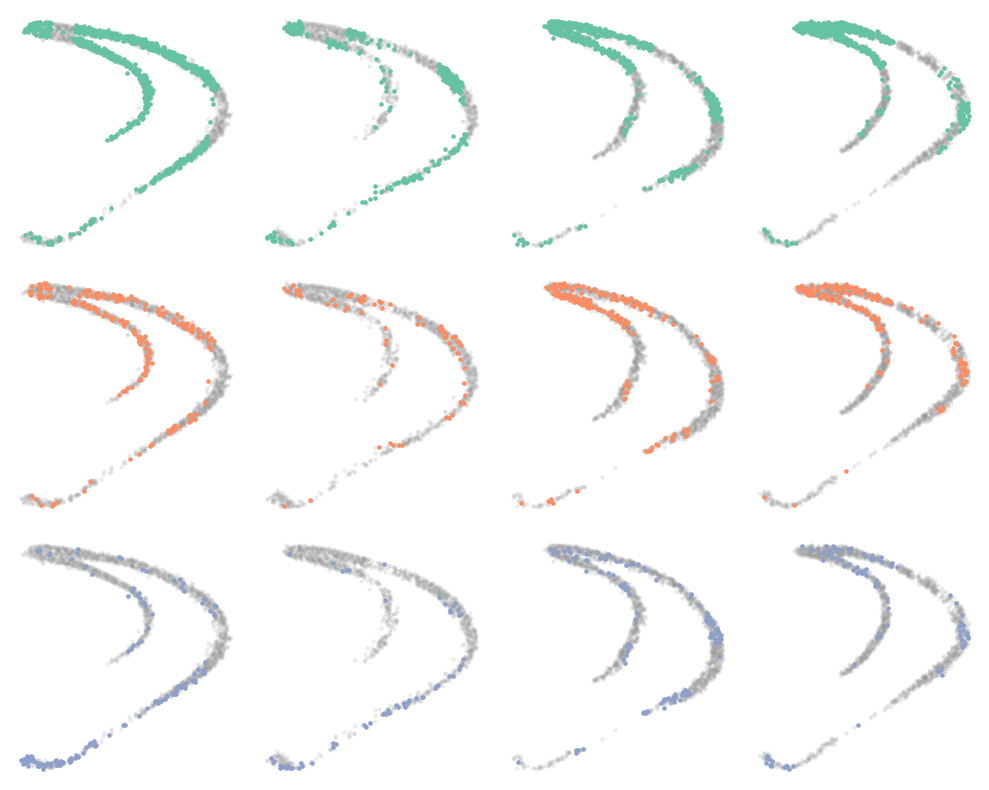

In [109]:
import scvelo as scv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置 Set2 调色板
set2_colors = sns.color_palette("Set2")
# 为已知类型指定颜色
palette = {'DG.Glut.0': set2_colors[0], 
           'DG.Glut.1': set2_colors[1], 
           'DG.Glut.2': set2_colors[2]}  # 为不同类型设置颜色

# 确保 RCTD 列是类别型
filtered_DG_PC1.obs['RCTD'] = filtered_DG_PC1.obs['RCTD'].astype('category')

# 获取所有在 RCTD 列中出现的类型
all_rctd_types = filtered_DG_PC1.obs['RCTD'].cat.categories

# 为未指定的类型分配默认颜色
default_color = 'gray'  # 默认颜色为灰色
for rctd_type in all_rctd_types:
    if rctd_type not in palette:
        palette[rctd_type] = default_color  # 给所有未在 palette 中的类型分配灰色

# 定义切片和类型
slices = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
types = ['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2']

# 设置绘图区域：3行4列
fig, axs = plt.subplots(3, 4, figsize=(10, 8), constrained_layout=True)  # 使用axs

# 迭代每个切片和类型来生成子图
for i, slice_type in enumerate(slices):
    for j, t in enumerate(types):
        ax = axs[j, i]  # 获取对应的子图

        # 根据切片筛选数据
        slice_data = filtered_DG_PC1[filtered_DG_PC1.obs['slice'] == slice_type]
        
        # 检查slice_data是否为空
        if slice_data.shape[0] == 0:
            print(f"Warning: No data found for {slice_type}")
            continue
        
        # 将NaN值替换为0
        slice_data.X = np.nan_to_num(slice_data.X, nan=0)

        # 获取需要的坐标和颜色
        coordinates = slice_data.obsm['stereo']
        rctd_values = slice_data.obs['RCTD']

        # 先绘制所有点为灰色背景
        ax.scatter(coordinates[:, 0], coordinates[:, 1], c='gray', alpha=0.1, s=5)

        # 只绘制当前类型的点
        ax.scatter(coordinates[rctd_values == t, 0], 
                   coordinates[rctd_values == t, 1], 
                   c=palette[t], label=t, alpha=1.0, s=5)

        # 设置标题
        #ax.set_title(f'{slice_type} - {t}')
        
        # 设置不显示坐标轴
        ax.axis('off')
        
        # 显示图例
        #ax.legend(loc='lower center', fontsize=8, bbox_to_anchor=(0.5, -0.2), ncol=4)

# 设置布局并显示图形
plt.tight_layout()
plt.show()
#output_path = "F:/spatial/HIP/figures/DG_RCTD.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()
#print(f"PDF saved as {output_path}")

In [97]:
NR2_2 = filtered_DG_PC1[filtered_DG_PC1.obs['slice']=='NR2_2']

In [98]:
NR2_2

View of AnnData object with n_obs × n_vars = 1280 × 1124
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'New_Type_transfer', 'New_Type_confidence', 'digital_layer', 'digital_column', 'slice', 'dpt_pseudotime', 'highlight', 'PC1', 'condition', 'RCTD'
    obsm: 'X_diffmap', 'X_pca', 'X_stereo', 'X_umap', 'stereo'
    layers: 'imputed', 'original_X'

In [103]:
slice_data = filtered_DG_PC1[filtered_DG_PC1.obs['slice'] == 'NR2_2']
print(np.any(np.isnan(slice_data.X)))  # 检查是否有NaN


True


In [114]:
NR_l23_PC1_2 = filtered_DG_PC1[filtered_DG_PC1.obs['slice']=='NR1_2']
NR_l23_PC2_2 = filtered_DG_PC1[filtered_DG_PC1.obs['slice']=='NR2_2']
DR_l23_PC1_2 = filtered_DG_PC1[filtered_DG_PC1.obs['slice']=='DR1_2']
DR_l23_PC2_2 = filtered_DG_PC1[filtered_DG_PC1.obs['slice']=='DR2_2']

In [48]:
NR_l23_PC1 = filtered_DG_PC1[filtered_DG_PC1.obs['condition']=='NR']
DR_l23_PC1 = filtered_DG_PC1[filtered_DG_PC1.obs['condition']=='DR']

In [131]:
filtered_DG_PC1.obs['slice']

81822    NR1_2
81823    NR1_2
81824    NR1_2
81826    NR1_2
81828    NR1_2
         ...  
31746    DR2_2
31749    DR2_2
31752    DR2_2
31754    DR2_2
31767    DR2_2
Name: slice, Length: 6266, dtype: category
Categories (4, object): ['DR1_2', 'DR2_2', 'NR1_2', 'NR2_2']

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 filtered 是你的 DataFrame，只包含想画的那几类
groups = ['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2']
colors = sns.color_palette("Set2", n_colors=len(groups))
filtered = NR_l23_PC1.obs[NR_l23_PC1.obs['RCTD'].isin(groups)]

fig, ax = plt.subplots(figsize=(4,4))
for grp, col in zip(groups, colors):
    sub = filtered[filtered['RCTD'] == grp]
    sns.kdeplot(
        data=sub,
        x="digital_layer",
        color=col,       # ← 单条曲线指定颜色
        label=grp,
        common_norm=False,
        ax=ax
    )

#ax.legend(title="RCTD")


# 去掉上、右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Digital Layer')
#ax.set_ylabel('Density')
ax.set_title('NR Digital Layer Density by RCTD')

plt.tight_layout()
#plt.show()
fig.savefig("F:/spatial/HIP/figures/HIP_NR_DG_kde.pdf", format='pdf', bbox_inches='tight')
plt.close(fig)


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 filtered 是你的 DataFrame，只包含想画的那几类
groups = ['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2']
colors = sns.color_palette("Set2", n_colors=len(groups))
filtered = DR_l23_PC1.obs[DR_l23_PC1.obs['RCTD'].isin(groups)]

fig, ax = plt.subplots(figsize=(4,4))
for grp, col in zip(groups, colors):
    sub = filtered[filtered['RCTD'] == grp]
    sns.kdeplot(
        data=sub,
        x="digital_layer",
        color=col,       # ← 单条曲线指定颜色
        label=grp,
        common_norm=False,
        ax=ax
    )

#ax.legend(title="RCTD")


# 去掉上、右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Digital Layer')
#ax.set_ylabel('Density')
ax.set_title('DR Digital Layer Density by RCTD')

plt.tight_layout()
#plt.show()
fig.savefig("F:/spatial/HIP/figures/HIP_DR_DG_kde.pdf", format='pdf', bbox_inches='tight')
plt.close(fig)


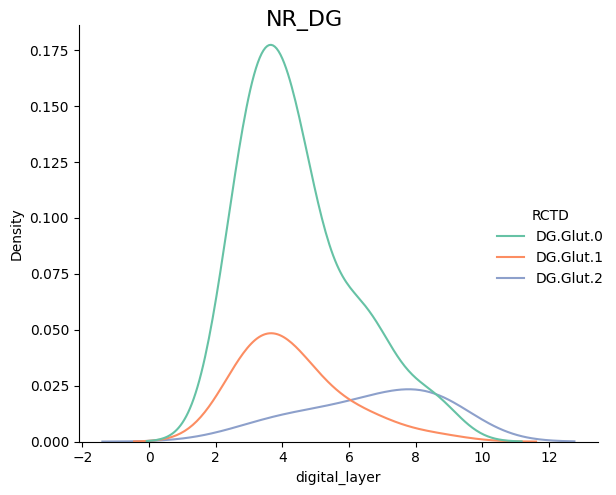

In [46]:
filtered_data = NR_l23_PC1.obs[NR_l23_PC1.obs['RCTD'].isin(['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'],
                bw_adjust =2)

# 添加标题
g.fig.suptitle('NR_DG', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('F:/spatial/HIP/figures/NR_DG.pdf', format='pdf')

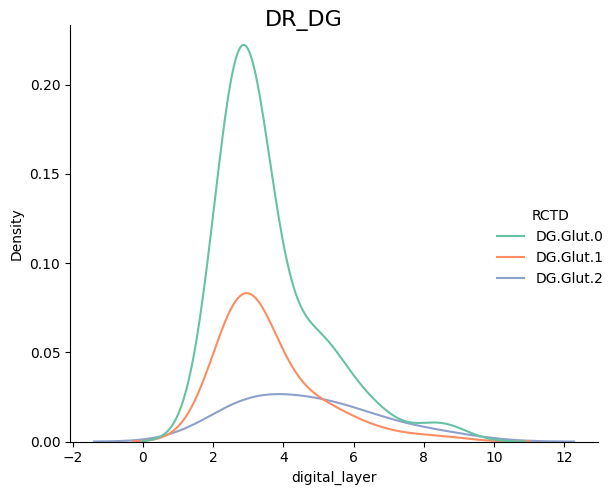

In [49]:
filtered_data = DR_l23_PC1.obs[DR_l23_PC1.obs['RCTD'].isin(['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'],
                bw_adjust =2)

# 添加标题
g.fig.suptitle('DR_DG', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('F:/spatial/HIP/figures/DR_DG.pdf', format='pdf')

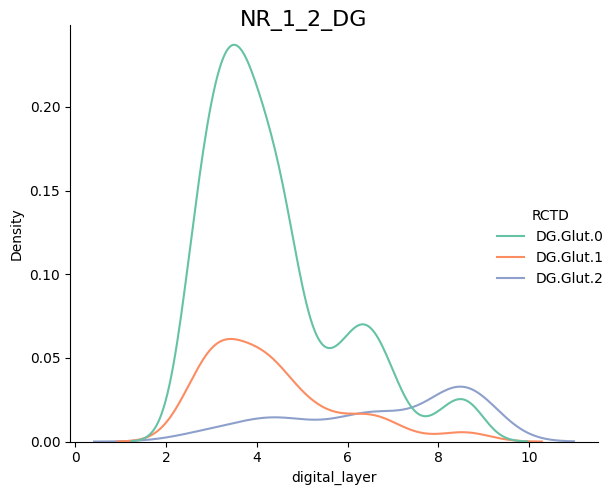

In [115]:
import seaborn as sns


filtered_data = NR_l23_PC1_2.obs[NR_l23_PC1_2.obs['RCTD'].isin(['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])

# 添加标题
g.fig.suptitle('NR_1_2_DG', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('NR_1_2_DG.pdf', format='pdf')

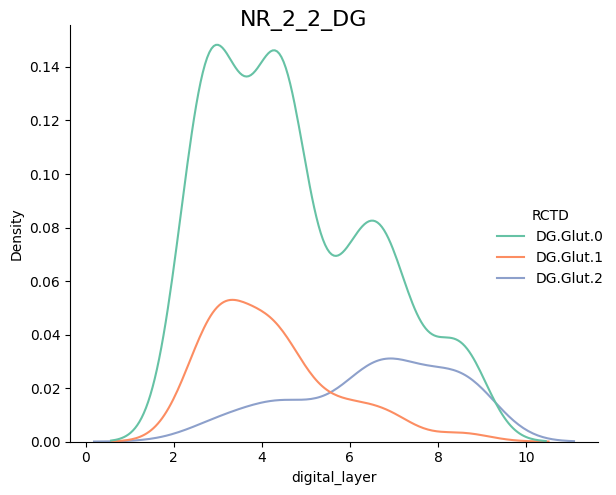

In [116]:
filtered_data = NR_l23_PC2_2.obs[NR_l23_PC2_2.obs['RCTD'].isin(['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])

# 添加标题
g.fig.suptitle('NR_2_2_DG', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('NR_2_2_DG.pdf', format='pdf')

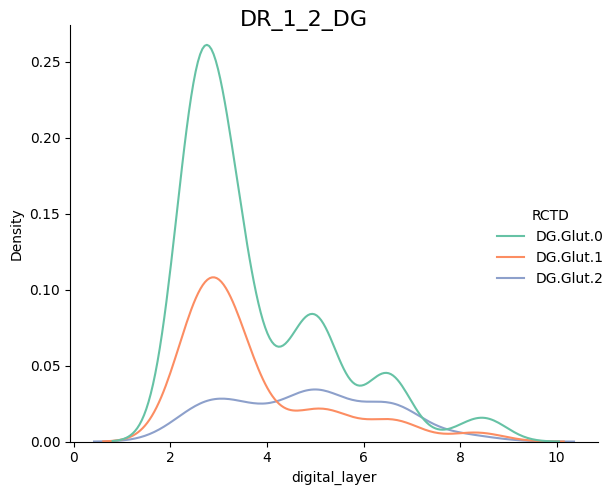

In [117]:
filtered_data = DR_l23_PC1_2.obs[DR_l23_PC1_2.obs['RCTD'].isin(['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])

# 添加标题
g.fig.suptitle('DR_1_2_DG', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('DR_1_2_DG.pdf', format='pdf')

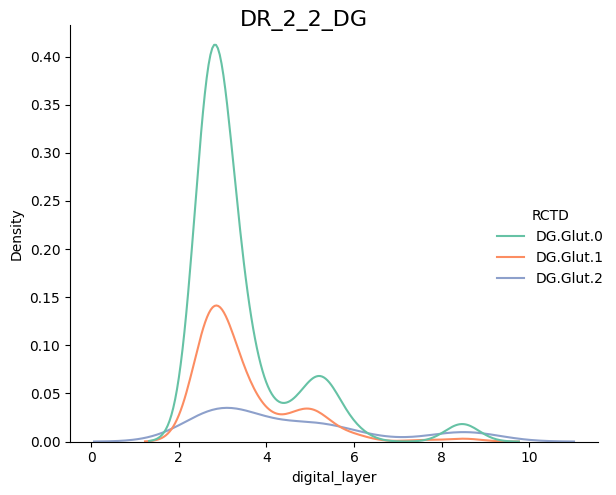

In [118]:
filtered_data = DR_l23_PC2_2.obs[DR_l23_PC2_2.obs['RCTD'].isin(['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['DG.Glut.0', 'DG.Glut.1', 'DG.Glut.2'])

# 添加标题
g.fig.suptitle('DR_2_2_DG', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('DR_2_2_DG.pdf', format='pdf')

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = NR1_2


# 目标基因
target_gene = 'Il16'

# 检查目标基因是否存在于数据中
if target_gene in data.var_names:
    coords = data.obsm['stereo']
    x_rot = coords[:, 0]
    y_rot = coords[:, 1]
    
    # 获取目标基因在 "imputed" 层的表达数据，并转换为一维数组
    gene_expression = data[:, target_gene].layers['imputed'].toarray().flatten()
    
    # 对表达数据先进行 Z-score 标准化，再用 Min-Max 归一化到 [0, 1]
    gene_expression_zscore = zscore(gene_expression)
    gene_expression_normalized = (gene_expression_zscore - gene_expression_zscore.min()) / (gene_expression_zscore.max() - gene_expression_zscore.min())
    
    # 创建散点图，使用旋转后的坐标
    plt.figure(figsize=(3, 3))
    plt.scatter(x_rot, y_rot, c=gene_expression_normalized, cmap='Reds', s=0.5)
    
    # 去掉坐标轴
    plt.axis('off')
    plt.show()
else:
    print(f"{target_gene} 不存在于数据中，请检查基因名称。")


Il16 不存在于数据中，请检查基因名称。


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 目标基因列表
target_genes = ['Fibcd1','Prox1','Iyd']

slices_dict = {
    'NR1_2r': NR1_2,
    'NR2_2r': NR2_2,
    'DR1_2r': DR1_2,
    'DR2_2r': DR2_2
}

# 图形布局：行数 = 4（切片数），列数 = 9（目标基因数）
n_rows = len(slices_dict)
n_cols = len(target_genes)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 3), constrained_layout=True)

# 遍历每个切片（行）和每个目标基因（列）
for i, (slice_name, adata_slice) in enumerate(slices_dict.items()):
    subset = adata_slice[adata_slice.obs['digital_layer'].between(1, 10)]
    
    # 使用旋转后的坐标，假设存储在 obsm['X_rotated']
    coords = subset.obsm['stereo']
    x_rot = coords[:, 0]
    y_rot = coords[:, 1]
    
    for j, gene in enumerate(target_genes):
        ax = axs[i, j]
        # 检查目标基因是否存在
        if gene not in subset.var_names:
            ax.text(0.5, 0.5, f"{gene}\n不存在", ha="center", va="center", fontsize=8)
            ax.axis("off")
            continue

        # 获取该基因在 'imputed' 层的表达数据，并转换为一维数组
        expr = subset[:, gene].layers['imputed'].toarray().flatten()
        # 标准化：先 Z-score，再 Min-Max 归一化到 [0, 1]
        expr_z = zscore(expr)
        expr_norm = (expr_z - expr_z.min()) / (expr_z.max() - expr_z.min())
        
        # 绘制散点图，颜色根据归一化后的表达值
        sc = ax.scatter(x_rot, y_rot, c=expr_norm, cmap='magma_r', s=0.5)
        #ax.set_title(f"{slice_name}\n{gene}", fontsize=8)
        ax.axis("off")
        # 为每个子图添加独立的竖直 colorbar
        #cbar = fig.colorbar(sc, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
        #cbar.ax.tick_params(labelsize=6)

#plt.suptitle("Rotated Spatial Expression of Target Genes", fontsize=16, y=1.02)
#plt.show()
output_path = "F:/spatial/HIP/figures/HIP_imputation.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/HIP/figures/HIP_imputation.pdf


In [72]:
df = pd.read_csv('F:/spatial/mean_corr_abs_merge_sorted.xls', sep='\t')
df[['gene_name', 'brain_region', 'layer']] = df['Gene'].str.split('_', expand=True)
filtered_df = df[(df['brain_region'] == 'HIP') & (df['layer'] == 'DG')]
print(filtered_df.head())
print("筛选出的条目数量：", filtered_df.shape[0])
# 根据 "Type" 列的不同值将基因分组，形成基于类型的 geneset 字典
type_genesets = {}
for t in filtered_df['Type'].unique():
    type_genesets[t] = filtered_df[filtered_df['Type'] == t]['gene_name'].tolist()
print("基于 Type 列生成的 geneset:")
for t, genes in type_genesets.items():
    print(f"{t}: {len(genes)} genes, {genes[:5]}...")

              Gene   NR_mean  clustering   DR_mean  Group           Type  \
58  Rapgef5_HIP_DG  0.935317           3  0.960810  DR-ON  Disactivation   
59  Lurap1l_HIP_DG  0.927634           3  0.953283  DR-ON  Disactivation   
60    Trpc5_HIP_DG  0.955439           3  0.980915  DR-ON  Disactivation   
61      Ust_HIP_DG  0.947721           3  0.973354  DR-ON  Disactivation   
62  Gm20319_HIP_DG  0.988106           3  1.013450  DR-ON  Disactivation   

   gene_name brain_region layer  
58   Rapgef5          HIP    DG  
59   Lurap1l          HIP    DG  
60     Trpc5          HIP    DG  
61       Ust          HIP    DG  
62   Gm20319          HIP    DG  
筛选出的条目数量： 571
基于 Type 列生成的 geneset:
Disactivation: 418 genes, ['Rapgef5', 'Lurap1l', 'Trpc5', 'Ust', 'Gm20319']...
TF-independent: 153 genes, ['Gm47283', 'March7', 'Tmem132e', 'Lingo1', 'Mmp24']...


In [73]:
adata = DG_PC1
adata.X = np.nan_to_num(adata.X)
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        DG_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

print("\n预定义的 8 个 geneset:")
for key, gene_list in genesets.items():
    print(f"{key}: {len(gene_list)} genes, {gene_list[:5]}...")

# 根据 Type 列生成的 geneset与上述 8 个 geneset分别取交集，形成新的 geneset
new_genesets = {}
for type_name, type_gene_list in type_genesets.items():
    for key, gene_list in genesets.items():
        common_genes = list(set(type_gene_list) & set(gene_list))
        # 如果交集非空，则存储
        if common_genes:
            new_geneset_name = f"{type_name}_{key}"
            new_genesets[new_geneset_name] = common_genes

print("\n新生成的 geneset（交集）:")
for name, genes in new_genesets.items():
    print(f"{name}: {len(genes)} genes, {genes[:5]}...")



预定义的 8 个 geneset:
RP_pos: 38 genes, ['St13', 'mt-Cytb', 'L3mbtl3', '4930567K20Rik', 'Rph3al']...
RP_neg: 110 genes, ['Runx1t1', 'Gtf2ird1', 'Gm15478', 'Tenm4', 'Schip1']...
RN_pos: 183 genes, ['Plekha2', 'Epb41', 'Hs6st3', 'Cdh18', '1810034E14Rik']...
RN_neg: 210 genes, ['Knop1', 'Ndst3', 'Ddx19b', 'Rab27b', 'Rragd']...
NRP_pos: 77 genes, ['Plppr1', 'Nae1', 'Cyp7b1', 'Gm42418', 'Ptprn']...
NRP_neg: 268 genes, ['Gm47167', 'Cby1', 'Lhfpl4', 'Ldb3', 'Thbs3']...
NRN_pos: 85 genes, ['Naaladl2', 'Fbxl7', 'Rab31', 'Lama2', 'Ipcef1']...
NRN_neg: 153 genes, ['Vmp1', 'Lrrtm1', 'Gm49003', '4930587E11Rik', 'Dcun1d1']...

新生成的 geneset（交集）:
Disactivation_RN_pos: 183 genes, ['Plekha2', 'Epb41', 'Hs6st3', 'Cdh18', '1810034E14Rik']...
Disactivation_RN_neg: 210 genes, ['Knop1', 'Ndst3', 'Ddx19b', 'Rab27b', 'Rragd']...
TF-independent_RP_pos: 38 genes, ['St13', 'mt-Cytb', 'L3mbtl3', '4930567K20Rik', 'Rph3al']...
TF-independent_RP_neg: 110 genes, ['Runx1t1', 'Gtf2ird1', 'Gm15478', 'Tenm4', 'Schip1']...


In [80]:
adata = DG_PC1
adata.X = np.nan_to_num(adata.X)
genesets = new_genesets
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
n_rows, n_cols = len(genesets), len(slice_categories)

# 创建绘图布局
fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 8 * n_rows))

for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    if not geneset:
        for ax in axs[row_idx, :]:
            ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 vmin, vmax 和 g_min, g_max
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)  # vmin 和 vmax 为数据的最小值和最大值
            g_clipped = np.clip(g, vmin, vmax)  # 将数据限制在 vmin 和 vmax 范围内
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)  # 归一化到 [0, 1]
            slice_g_values[slice_category] = (g_norm, slice_data.obsm['stereo'][:, 0], slice_data.obsm['stereo'][:, 1])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]  # 基准 slice 的 g_min 和 g_max

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x, y = slice_g_values.get(slice_category, (None, None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 缩放公式
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x, y)

    # Step 4: 绘制每个 slice 的图
    for col_idx, slice_category in enumerate(slice_categories):
        ax = axs[row_idx, col_idx]
        adjusted_g, x, y = adjusted_g_values.get(slice_category, (None, None, None))

        if adjusted_g is None:
            ax.axis("off")
            continue

        # 绘制散点图，使用基准 slice 的颜色范围 [0, 1]
        scatter = ax.scatter(
            x, y,
            c=adjusted_g, cmap='seismic', s=10, alpha=0.8, vmin=0, vmax=1
        )

        # 设置标题
        ax.set_title(f"{slice_category} - {geneset_name}", fontsize=10)
        ax.axis("off")

# 添加全局颜色条
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [左, 下, 宽度, 高度]
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap='seismic'),
    cax=cbar_ax,
    orientation='horizontal'
)
cbar.set_label('Gene Expression (Adjusted)', fontsize=12)

# 添加总标题并调整位置
plt.suptitle("Gene Expression with Slice-wise Clipping and Scaling (5%-95%)", fontsize=16, y=0.97)
plt.subplots_adjust(top=0.9, bottom=0.1)  # 调整布局，避免重叠
#plt.show()
output_path = "F:/spatial/HIP/figures/HIP_DG_TF_adjusted_g.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/HIP_DG_TF_adjusted_g.pdf


In [100]:
adata = DG_PC1
adata.X = np.nan_to_num(adata.X)
genesets = new_genesets
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建 1列8行的图形布局
fig, axs = plt.subplots(4, 1, figsize=(4, 4 * len(genesets)), constrained_layout=True)

# 为每个 geneset 绘制一个折线图
for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    ax = axs[row_idx]  # 获取子图

    if not geneset:
        ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 g 值并缩放
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)
            g_clipped = np.clip(g, vmin, vmax)
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)
            slice_g_values[slice_category] = (g_norm, slice_data.obs['digital_layer'])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x = slice_g_values.get(slice_category, (None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 使用基准 slice 的缩放公式调整 g 值
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x)

    # Step 4: 合并 NR 和 DR 数据
    nr_g_values = []
    nr_x_values = []
    dr_g_values = []
    dr_x_values = []

    for slice_category in ['NR1_2', 'NR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            nr_g_values.append(g)
            nr_x_values.append(x)

    for slice_category in ['DR1_2', 'DR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            dr_g_values.append(g)
            dr_x_values.append(x)

    if nr_g_values:
        nr_g_values = np.concatenate(nr_g_values)
        nr_x_values = np.concatenate(nr_x_values)

    if dr_g_values:
        dr_g_values = np.concatenate(dr_g_values)
        dr_x_values = np.concatenate(dr_x_values)
        
    smooth_frac = 0.66  # 越大曲线越平滑
    
    # Step 5: 绘制综合后的折线图
    for g_values, x_values, color, label in zip(
        [nr_g_values, dr_g_values],
        [nr_x_values, dr_x_values],
        sns.color_palette()[:2],
        ['NR', 'DR']
    ):
        if g_values.size > 0:
            bins = np.arange(min(x_values), max(x_values), 0.25)
            bin_centers = 0.5 * (bins[1:] + bins[:-1])

            # 计算每个 bin 的均值和标准差
            binned_means = [np.mean(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                            for i in range(len(bins) - 1)]
            binned_std = [np.std(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                          for i in range(len(bins) - 1)]

            # LOWESS 会返回和 bin_centers 对应长度的平滑值
            means_smooth = lowess(
                       binned_means, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )
            std_smooth = lowess(
                       binned_std, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )

            # 绘制平滑后的曲线
            ax.plot(bin_centers, means_smooth, color=color, label=label)

            # 绘制阴影：用平滑后的标准差 * 0.05
            ax.fill_between(
                 bin_centers,
                 means_smooth - std_smooth * 0.05,
                 means_smooth + std_smooth * 0.05,
                 color=color, alpha=0.1)

    # 设置图标题和标签
    ax.set_title(f"{geneset_name}", fontsize=14)
    #ax.set_ylim(0.2, 0.8)
    ax.set_xlabel('Digital Layer', fontsize=12)
    ax.set_ylabel('Normalized Gene Expression', fontsize=12)

    ax.legend(title="Conditions", fontsize=10, loc="upper right")

# 添加总标题
plt.suptitle("Line Plots of Gene Expression across Conditions", fontsize=16, y=1.02)
#plt.show()
output_path = "F:/spatial/HIP/figures/HIP_DG_TF_adjusted_g_lineplot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/HIP_DG_TF_adjusted_g_lineplot.pdf


In [23]:
import numpy as np
import pandas as pd
all_genes = sorted({
    gene
    for gene_list in new_genesets.values()
    for gene in gene_list
})

# 接下来直接用 all_genes 来替代原来的固定列表
genes = all_genes
conditions = ['NR', 'DR']
bin_width = 0.25

# 确保 adata 已经预处理好
adata = DG_PC1.copy()
adata.X = np.nan_to_num(adata.X)

results = []
for gene in genes:
    slopes = {}
    for cond in conditions:
        cd = adata[adata.obs['condition'] == cond]
        expr = cd[:, gene].X.toarray().flatten()
        layer = cd.obs['digital_layer'].astype(float).values

        bins = np.arange(layer.min(), layer.max() + bin_width, bin_width)
        centers = 0.5 * (bins[:-1] + bins[1:])
        means = []
        for i in range(len(bins)-1):
            m = (layer >= bins[i]) & (layer < bins[i+1])
            means.append(expr[m].mean() if m.sum()>0 else np.nan)
        means = np.array(means)
        valid = ~np.isnan(means)
        if valid.sum() < 2:
            slope = np.nan
        else:
            slope = (means[valid][-1] - means[valid][0]) / (centers[valid][-1] - centers[valid][0])
        slopes[cond] = slope

    results.append({
        'gene': gene,
        'slope_NR': slopes.get('NR', np.nan),
        'slope_DR': slopes.get('DR', np.nan),
        'abs_diff': abs(slopes.get('NR', np.nan) - slopes.get('DR', np.nan))
    })

df = pd.DataFrame(results)
best = df.loc[df['abs_diff'].idxmax()]

top10 = df.sort_values('abs_diff', ascending=False).head(10)

# 显示结果
print(top10[['gene', 'slope_NR', 'slope_DR', 'abs_diff']])


        gene  slope_NR  slope_DR  abs_diff
328    Nek10  0.000000  0.200419  0.200419
379     Pifo  0.000000  0.176510  0.176510
512    Tshz3  0.000000  0.139860  0.139860
239     Gmds  0.000000  0.126431  0.126431
486     Syn3 -0.017864 -0.132985  0.115121
346    Ntng1 -0.042465 -0.152795  0.110330
443     Sgcz  0.038215  0.148142  0.109926
334      Nhs  0.076612  0.181521  0.104910
165  Gm11099  0.029815  0.134194  0.104379
364   Pcdh19  0.000000  0.103883  0.103883


In [81]:
adata = DG_PC1.copy()
adata.X = np.nan_to_num(adata.X)
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        DG_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

import pandas as pd

slopes = (
    DG_PC1_df[['Gene','NR_slope','DR_slope']]
    .dropna(subset=['NR_slope','DR_slope'])
    .copy()
)
# 计算差值列
slopes['diff'] = (slopes['NR_slope'] - slopes['DR_slope']).abs()

# 2) 对每个 geneset 单独筛选并取 top10
top15_per_set = {}
for set_name, gene_list in genesets.items():
    sub = slopes[slopes['Gene'].isin(gene_list)]
    top15 = (
        sub
        .sort_values('diff', ascending=False)
        .head(15)
        .reset_index(drop=True)
    )
    top15_per_set[set_name] = top15[['Gene','NR_slope','DR_slope','diff']]

# 3) 打印结果
for set_name, df_top in top15_per_set.items():
    print(f"\n=== {set_name} (top 15) ===")
    print(df_top.to_string(index=False))



=== RP_pos (top 15) ===
         Gene  NR_slope  DR_slope     diff
      Gm28376  0.002885 -0.000650 0.003535
         Vav3  0.002753  0.000021 0.002732
       Frmd4b  0.000266 -0.002371 0.002637
        Epha7  0.004659  0.002251 0.002407
      mt-Atp6  0.000555 -0.001728 0.002283
          Mkx  0.000022 -0.002090 0.002112
4930567K20Rik  0.001627 -0.000416 0.002043
9630028H03Rik  0.001949  0.000181 0.001768
        Epha3  0.002106  0.000356 0.001751
      Gm49127  0.000392 -0.001341 0.001733
      Ldlrad4  0.000412  0.001878 0.001466
4930545L23Rik  0.001019 -0.000338 0.001357
      mt-Cytb  0.000295 -0.001011 0.001306
         Nrgn  0.002297  0.001028 0.001269
        Kcnt2  0.004707  0.003442 0.001264

=== RP_neg (top 15) ===
         Gene  NR_slope  DR_slope     diff
      Gm47283 -0.002689  0.002322 0.005011
        Cdh13 -0.006470 -0.001804 0.004666
        Slit2 -0.002757  0.001237 0.003994
         Sgcz -0.005730 -0.001911 0.003819
        Car10 -0.009355 -0.005888 0.003466
    

In [169]:
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        DG_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

import pandas as pd

slopes = (
    DG_PC1_df[['Gene','NR_slope','DR_slope']]
    .dropna(subset=['NR_slope','DR_slope'])
    .copy()
)
# 计算差值列
slopes['diff'] = (slopes['NR_slope'] - slopes['DR_slope']).abs()
top10_per_set = {}

# 前四个 geneset：选差值最大的
for set_name in ['RP_pos', 'RP_neg', 'RN_pos', 'RN_neg']:
    gene_list = genesets[set_name]
    sub = slopes[slopes['Gene'].isin(gene_list)]
    top10 = (
        sub
        .sort_values('diff', ascending=False)
        .head(20)
        .reset_index(drop=True)
    )
    top10_per_set[set_name] = top10[['Gene', 'NR_slope', 'DR_slope', 'diff']]

# 后四个 geneset：优先考虑偏离 0 最远，同时 NR/DR 差异最小的基因
for set_name in ['NRP_pos', 'NRP_neg', 'NRN_pos', 'NRN_neg']:
    gene_list = genesets[set_name]
    sub = slopes[slopes['Gene'].isin(gene_list)].copy()

    # 添加三个评估指标
    sub['abs_NR'] = sub['NR_slope'].abs()
    sub['abs_DR'] = sub['DR_slope'].abs()
    sub['max_abs'] = sub[['abs_NR', 'abs_DR']].max(axis=1)

    # 先按 max_abs 降序（偏离0最远），再按 diff 升序（两者最接近）
    top10 = (
        sub
        .sort_values(['max_abs', 'diff'], ascending=[False, True])
        .head(20)
        .reset_index(drop=True)
    )
    top10_per_set[set_name] = top10[['Gene', 'NR_slope', 'DR_slope', 'diff']]

# 打印结果
for set_name, df_top in top10_per_set.items():
    print(f"\n=== {set_name} (top 10) ===")
    print(df_top.to_string(index=False))




=== RP_pos (top 10) ===
         Gene  NR_slope  DR_slope     diff
      Gm28376  0.002885 -0.000650 0.003535
         Vav3  0.002753  0.000021 0.002732
       Frmd4b  0.000266 -0.002371 0.002637
        Epha7  0.004659  0.002251 0.002407
      mt-Atp6  0.000555 -0.001728 0.002283
          Mkx  0.000022 -0.002090 0.002112
4930567K20Rik  0.001627 -0.000416 0.002043
9630028H03Rik  0.001949  0.000181 0.001768
        Epha3  0.002106  0.000356 0.001751
      Gm49127  0.000392 -0.001341 0.001733
      Ldlrad4  0.000412  0.001878 0.001466
4930545L23Rik  0.001019 -0.000338 0.001357
      mt-Cytb  0.000295 -0.001011 0.001306
         Nrgn  0.002297  0.001028 0.001269
        Kcnt2  0.004707  0.003442 0.001264
         Tle1  0.001075  0.000022 0.001053
        Epha5  0.009687  0.010680 0.000994
        Prkd1  0.002217  0.001277 0.000940
        Bach2  0.000705 -0.000215 0.000921
      Ccdc171  0.000278  0.001195 0.000917

=== RP_neg (top 10) ===
         Gene  NR_slope  DR_slope     diff
    

In [178]:
genes = ['4930545L23Rik','Cntn5','Kctd1','Csmd2os','Plcl1','Asic2','Robo2','Gm1992']

# 设置条件（NR 和 DR）
conditions = ['NR', 'DR']
condition_colors = {
    'NR': '#E7241D',   
    'DR': '#2372A9'    
}
# 设置 bin 宽度
bin_width = 0.25

# 创建子图布局，纵向显示不同gene
fig, axes = plt.subplots(len(genes), 1, figsize=(3.2, 4 * len(genes)))

smooth_frac = 0.66  # 越大曲线越平滑

# 为每个基因绘制折线图
for i, gene in enumerate(genes):
    ax = axes[i]  # 获取当前子图位置
    
    for condition in conditions:
        color = condition_colors[condition]
        # 获取当前条件的数据
        condition_data = DG_PC1[adata.obs['condition'] == condition]
        
        # 获取基因表达值和 digital_layer 数据
        gene_expression = condition_data[:, gene].X.toarray().flatten()
        digital_layer = condition_data.obs['digital_layer'].values
        
        # 创建 bins，范围从 min 到 max，步长为 bin_width
        bins = np.arange(min(digital_layer), max(digital_layer), bin_width)
        bin_centers = 0.5 * (bins[1:] + bins[:-1])
        
        # 计算每个 bin 的均值和标准差
        binned_means = [np.mean(gene_expression[(digital_layer >= bins[i]) & (digital_layer < bins[i + 1])])
                        for i in range(len(bins) - 1)]
        binned_std = [np.std(gene_expression[(digital_layer >= bins[i]) & (digital_layer < bins[i + 1])])
                      for i in range(len(bins) - 1)]
        
         # LOWESS 会返回和 bin_centers 对应长度的平滑值
        means_smooth = lowess(
                       binned_means, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )
        std_smooth = lowess(
                       binned_std, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )

        # 绘制平滑后的曲线
        ax.plot(bin_centers, means_smooth,color=color,label=f'{condition}')

        # 绘制阴影：用平滑后的标准差 * 0.05
        ax.fill_between(
                 bin_centers,
                 means_smooth - std_smooth * 0.05,
                 means_smooth + std_smooth * 0.05,
                 alpha=0.1,color=color
             )   
    
    # 设置图标题和标签
#    ax.set_title(f"Gene Expression for {gene}", fontsize=14)
#    ax.set_xlabel('Digital Layer', fontsize=12)
#    ax.set_ylabel('Gene Expression', fontsize=12)
    
    # 设置图例
#    ax.legend(title="Conditions", fontsize=10, loc="upper right")

# 调整子图布局
#plt.subplots_adjust(hspace=0.4)
#plt.show()
output_path = "F:/spatial/HIP/figures/HIP_DG_TF_gene_lineplot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/HIP/figures/HIP_DG_TF_gene_lineplot.pdf


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

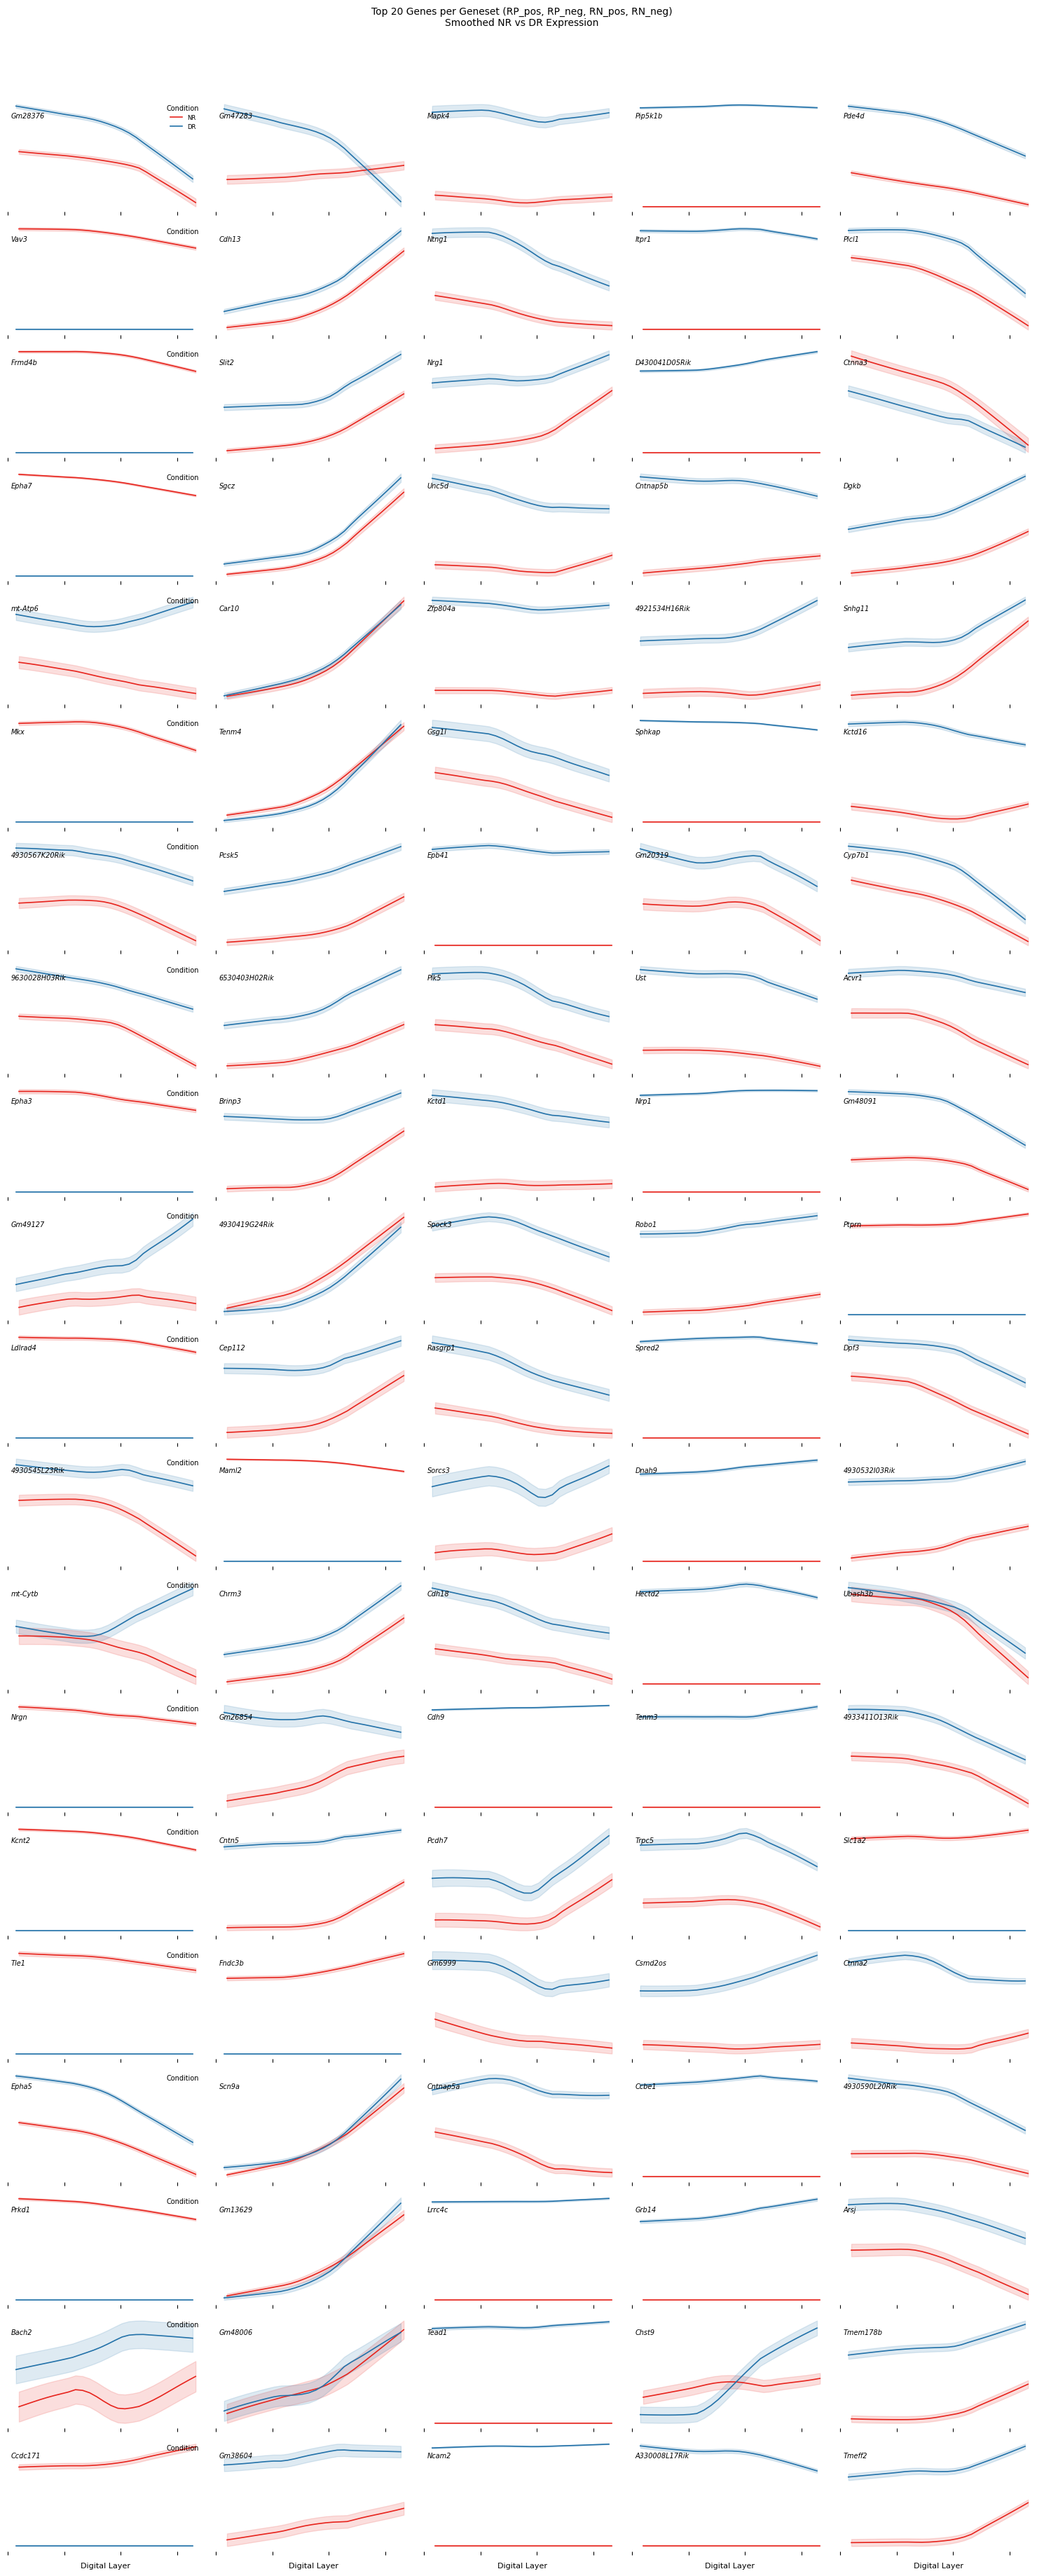

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# 假设 DG_PC1 是一个 AnnData，包含所有样本（NR + DR），
# DG_PC1.obs['condition'] 中存储的是 'NR' 或 'DR'，
# DG_PC1.obs['digital_layer'] 中存储的是连续的空间层次数值。

adata = DG_PC1
adata.X = np.nan_to_num(adata.X)

# 1) 前四个基因集已经在 top10_per_set 中筛出了前 20 个基因，保存在 top20_per_set（改名一下以免混淆）
#    top20_per_set 的 key 包括 'RP_pos', 'RP_neg', 'RN_pos', 'RN_neg'
#    值是一个 DataFrame，里面有列 ['Gene','NR_slope','DR_slope','diff']，index 0..19 即前 20 条

# 我们把它改个名字：
top20_per_set = {}
for set_name in ['RP_pos', 'RP_neg', 'RN_pos', 'RN_neg','NRP_pos']:
    # 原来你用 head(20) 就是 top20
    df20 = top10_per_set[set_name]  # 之前的 top10_per_set 存的其实是前 20
    top20_per_set[set_name] = df20['Gene'].tolist()

# 2) 接下来开始绘图

geneset_names = ['RP_pos', 'RP_neg', 'RN_pos', 'RN_neg','NRP_pos']
n_cols = len(geneset_names)
n_rows = 20  # 每个基因集选前 20 个

# 定义 NR/DR 颜色
condition_colors = {
    'NR': '#E7241D',   # 红色
    'DR': '#2372A9'    # 深蓝
}

bin_width = 0.25
smooth_frac = 0.66  # LOWESS 平滑参数，可根据需要微调

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 3, n_rows * 1.8),  # 宽度每列约 3 英寸，高度每行约 1.8 英寸
    sharex=True, sharey=False,
    constrained_layout=True
)

# 如果 axes 维度是 (20,4)，则 axes[i,j] 为第 i 行第 j 列子图
for col_idx, geneset_name in enumerate(geneset_names):
    gene_list = top20_per_set[geneset_name]  # 取该列的 20 个基因
    for row_idx, gene in enumerate(gene_list):
        ax = axes[row_idx, col_idx]

        # 每个子图绘制该基因在 NR/DR 条件下的平滑曲线
        for condition in ['NR', 'DR']:
            color = condition_colors[condition]
            # 从 AnnData 里筛选当前条件
            cond_data = adata[adata.obs['condition'] == condition]

            # 检查该基因是否存在
            if gene not in cond_data.var_names:
                # 如果基因名在这个条件下缺失，就跳过
                continue

            # 原始表达值
            expr = np.asarray(cond_data[:, gene].X).flatten()
            layers = cond_data.obs['digital_layer'].astype(float).values

            # 为了避免 bin 少于两点或层次完全相同，这里先确认有足够数据:
            if layers.size == 0 or expr.size == 0:
                continue

            # 建立 bin
            bins = np.arange(layers.min(), layers.max() + 1e-6, bin_width)
            bin_centers = 0.5 * (bins[:-1] + bins[1:])

            # 统计每个 bin 的均值和标准差
            binned_means = []
            binned_std = []
            for k in range(len(bins) - 1):
                mask = (layers >= bins[k]) & (layers < bins[k + 1])
                vals = expr[mask]
                if vals.size > 0:
                    binned_means.append(vals.mean())
                    binned_std.append(vals.std())
                else:
                    # 如果当前 bin 里没有细胞，则填充 nan
                    binned_means.append(np.nan)
                    binned_std.append(0.0)

            binned_means = np.array(binned_means)
            binned_std = np.array(binned_std)

            # 用 LOWESS 做一次平滑（对 NaN 先做掩码）
            valid_mask = ~np.isnan(binned_means)
            if valid_mask.sum() < 2:
                # 样本太少，跳过平滑，直接画原始均值
                y_smooth = binned_means
                y_std_smooth = binned_std
            else:
                x_valid = bin_centers[valid_mask]
                y_valid = binned_means[valid_mask]
                sd_valid = binned_std[valid_mask]

                y_smooth = lowess(
                    y_valid, x_valid,
                    frac=smooth_frac,
                    return_sorted=False
                )
                # 标准差同样做平滑
                y_std_smooth = lowess(
                    sd_valid, x_valid,
                    frac=smooth_frac,
                    return_sorted=False
                )
                # 将结果恢复到完整长度（对缺失 bin 保持 nan 或 0）
                full_y = np.full_like(binned_means, np.nan, dtype=float)
                full_sd = np.zeros_like(binned_std)
                full_y[valid_mask] = y_smooth
                full_sd[valid_mask] = y_std_smooth
                y_smooth = full_y
                y_std_smooth = full_sd

            # 绘制平滑曲线
            ax.plot(
                bin_centers, y_smooth,
                color=color,
                linewidth=1.2,
                label=condition if row_idx == 0 and col_idx == 0 else None
            )
            # 阴影带：用平滑后的标准差 * 0.05
            ax.fill_between(
                bin_centers,
                y_smooth - 0.05 * y_std_smooth,
                y_smooth + 0.05 * y_std_smooth,
                color=color, alpha=0.15
            )

        # 每一行只在最左侧子图画一次图例
        if col_idx == 0:
            ax.legend(
                title="Condition",
                fontsize=6,
                title_fontsize=7,
                loc="upper right",
                frameon=False
            )

        # 在每个子图左侧标示基因名
        ax.text(
            0.02, 0.85, gene,
            transform=ax.transAxes,
            fontsize=7, fontstyle='italic',
            va='center', ha='left'
        )

        # 只在最底行显示 x 轴标签
        if row_idx < n_rows - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel("Digital Layer", fontsize=8)

        # 不显示 y 轴刻度（如果不需要）
        ax.set_yticks([])

        # 去掉子图四周边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

# 在最底层的任一子图统一添加一个横向 colorbar（可选）——如果要显示，则先整合一下 min/max：
# all_means = []
# for subdf in top20_per_set.values():
#     for gene in subdf:
#         arr = np.asarray(adata[:, gene].X).flatten()
#         clipped = np.clip(arr, np.percentile(arr, 5), np.percentile(arr, 95))
#         all_means.append(clipped)
# all_means = np.concatenate(all_means)
# vmin_glob = np.percentile(all_means, 5)
# vmax_glob = np.percentile(all_means, 95)
# 
# cbar_ax = fig.add_axes([0.15, 0.02, 0.7, 0.015])
# norm = plt.Normalize(vmin=vmin_glob, vmax=vmax_glob)
# cb = fig.colorbar(
#     plt.cm.ScalarMappable(norm=norm, cmap='viridis'),
#     cax=cbar_ax,
#     orientation='horizontal'
# )
# cb.set_label("Expression (5%-95% clip)", fontsize=8)
# cb.ax.tick_params(labelsize=6)

plt.suptitle("Top 20 Genes per Geneset (RP_pos, RP_neg, RN_pos, RN_neg)\nSmoothed NR vs DR Expression", fontsize=10, y=1.02)
plt.tight_layout()
plt.show()


In [179]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 数据准备：使用 NR1_2 数据替换为你自己的数据对象
adata = DG_PC1
adata.X = np.nan_to_num(adata.X)

# 目标基因列表（原始表达量绘图，不做标准化处理）
genes = ['4930545L23Rik','Cntn5','Kctd1','Csmd2os','Plcl1','Asic2','Robo2','Gm1992']

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建子图布局，每行对应一个目标基因，每列对应一个 slice
n_rows = len(genes)
n_cols = len(slice_categories)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 5), constrained_layout=True)

# 为每个 gene 和每个 slice 绘制散点图
for i, gene in enumerate(genes):
    for j, slice_category in enumerate(slice_categories):
        ax = axes[i, j]
        
        # 筛选当前 slice 的数据
        subset = adata[adata.obs['slice'] == slice_category, :]
        
        # 获取旋转后的空间坐标，假定存储在 obsm['stereo_rotated']
        coords = subset.obsm['stereo']
        x = coords[:, 0]
        y = coords[:, 1]
        
        # 获取当前基因的原始表达数据（不进行标准化）
        expr = np.asarray(subset[:, gene].X).flatten()
        
        # 使用 plt.scatter 绘制散点图，颜色根据原始表达量
        sc = ax.scatter(x, y, c=expr, cmap='coolwarm', s=20)
        
        # 添加子图标题，显示 slice 和基因名称
        #ax.set_title(f"{slice_category}\n{gene}", fontsize=8)
        ax.axis("off")
        
        # 为每个子图添加独立的竖直 colorbar
        cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
        cbar.ax.tick_params(labelsize=30)

#plt.suptitle("Gene Expression (Raw)", fontsize=16, y=1.02)
#plt.show()
output_path = "F:/spatial/HIP/figures/HIP_DG_TF_gene.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/HIP/figures/HIP_DG_TF_gene.pdf


In [188]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 DG_PC1 是已经加载好的 AnnData，含有所有切片数据
adata = DG_PC1
adata.X = np.nan_to_num(adata.X)

# 目标基因列表（使用最原始的表达量，不做归一化或 Z-score）
genes = [
    '4930545L23Rik', 'Cntn5', 'Kctd1', 'Csmd2os',
    'Plcl1', 'Asic2', 'Robo2', 'Gm1992']

# 四个 slice 的名称
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建一个 (8 行 × 4 列) 的子图布局
n_rows = len(genes)
n_cols = len(slice_categories)
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 4, n_rows * 5),
    constrained_layout=True
)

for i, gene in enumerate(genes):
    for j, slice_category in enumerate(slice_categories):
        ax = axes[i, j]

        # 1) 先按 slice 筛选数据
        subset = adata[adata.obs['slice'] == slice_category, :]
        if subset.n_obs == 0:
            ax.axis('off')
            continue

        # 2) 取出旋转坐标
        coords = subset.obsm['stereo']  # 或者 'stereo_rotated'，看你实际存放的位置
        x = coords[:, 0]
        y = coords[:, 1]

        # 3) 取出原始表达值
        expr = np.asarray(subset[:, gene].X).flatten()

        # 如果该基因在本切片不存在，就标出提示文字
        if expr.size == 0:
            ax.text(
                0.5, 0.5,
                f"{gene}\n不存在",
                ha='center', va='center',
                fontsize=8
            )
            ax.axis('off')
            continue

        # 4) 对表达值做升序排序，确保"蓝色→红色"的顺序
        order = np.argsort(expr)
        x_sorted = x[order]
        y_sorted = y[order]
        expr_sorted = expr[order]

        # 5) 绘制散点：表达最低的先画，表达最高的最后画
        sc = ax.scatter(
            x_sorted, y_sorted,
            c=expr_sorted,
            cmap='coolwarm',
            s=20,
            vmin=np.min(expr_sorted),
            vmax=np.max(expr_sorted)
        )

        # 6) 隐藏坐标轴，仅保留 colorbar
        ax.axis('off')

        # 7) 给每个子图单独添加竖直方向的 colorbar
        cbar = plt.colorbar(
            sc, ax=ax,
            orientation='vertical',
            fraction=0.05,
            pad=0.05
        )
        # 根据需要调整 colorbar 刻度字体大小
        cbar.ax.tick_params(labelsize=30)
#plt.show()
# 最终保存成 PDF
output_path = "F:/spatial/HIP/figures/HIP_DG_TF_gene.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/HIP/figures/HIP_DG_TF_gene.pdf
